### Architetture dati - progetto use case "Data management for Machine Learning"

In [234]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

import time

## 1. Inizializzazione del dataset load_breast_cancer()
Il dataset è ottimo per questo progetto dato il numero elavato di features (30).


Il dataset contiene 30 caratteristiche (attributi) che descrivono le proprietà dei nuclei delle cellule tumorali ottenute tramite immagini di aspirato con ago sottile (FNA) di una massa al seno. Le caratteristiche sono suddivise in tre gruppi principali: media, errore standard, e i "peggiori" (cioè, il valore massimo) di queste caratteristiche per ogni immagine.


Il dataset include anche una variabile di destinazione (target) binaria che indica se il tumore è maligno (0) o benigno (1).

Inoltre questo dataset risulta comodo in quanto disponibile direttamente da sklearn.datasets

In [235]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

## 2. Analisi esplorativa dei dati
Vado adesso ad eseguire un analisi esplorativa dei dati per capire meglio il dataset.

### 2.1 Verifica del numero di features e di istanze
Come prima cosa verifichiamo il numero di features e di istanze: 30 e 569 rispettivamente.


Il target è binario:
* 0 = Maligno
* 1 = Benigno

In [236]:
#print number of features
print(f"Number of features: {len(data.feature_names)}")
#print number of istances
print(f"Number of istances: {len(df)}")

df.head()

Number of features: 30
Number of istances: 569


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2.2 Distribuzione della Diagnosi del Tumore

Questo codice genera un grafico a barre che rappresenta la distribuzione della variabile target "target" nel dataset "df". La variabile target indica la diagnosi del tumore, con 0 che indica un tumore maligno e 1 che indica un tumore benigno.

Il grafico è suddiviso in due barre:

* **Barra rossa:** Rappresenta la frequenza dei tumori maligni.
* **Barra blu:** Rappresenta la frequenza dei tumori benigni.

L'asse x del grafico rappresenta la diagnosi del tumore (0 = maligno, 1 = benigno). L'asse y del grafico rappresenta la frequenza delle diverse diagnosi.

**Interpretazione:**

Il grafico mostra che nel dataset "Breast Cancer Wisconsin ..." ci sono più tumori benigni che tumori maligni. La frequenza dei tumori maligni è circa il 37.2%, mentre la frequenza dei tumori benigni è circa il 62.7%.

**Informazioni aggiuntive:**

* Il codice utilizza la libreria seaborn per generare il grafico a barre.
* La funzione `sns.countplot()` è utilizzata per creare il grafico a barre.
* L'argomento `data=df` indica il dataset da utilizzare per generare il grafico.
* L'argomento `x='target'` indica la variabile da utilizzare per l'asse x del grafico.
* L'argomento `palette=['red', 'blue']` indica i colori da utilizzare per le barre del grafico.
* L'argomento `hue='target'` indica che le barre del grafico devono essere suddivise in base al valore della variabile target.
* L'argomento `dodge=False` indica che le barre del grafico non devono essere separate.
* L'argomento `legend=False` indica che la legenda del grafico non deve essere visualizzata.
* Il metodo `plt.title()` è utilizzato per impostare il titolo del grafico.
* Il metodo `plt.xlabel()` è utilizzato per impostare l'etichetta dell'asse x del grafico.
* Il metodo `plt.ylabel()` è utilizzato per impostare l'etichetta dell'asse y del grafico.
* Il metodo `plt.show()` è utilizzato per visualizzare il grafico.

Percentuali di diagnosi:
target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


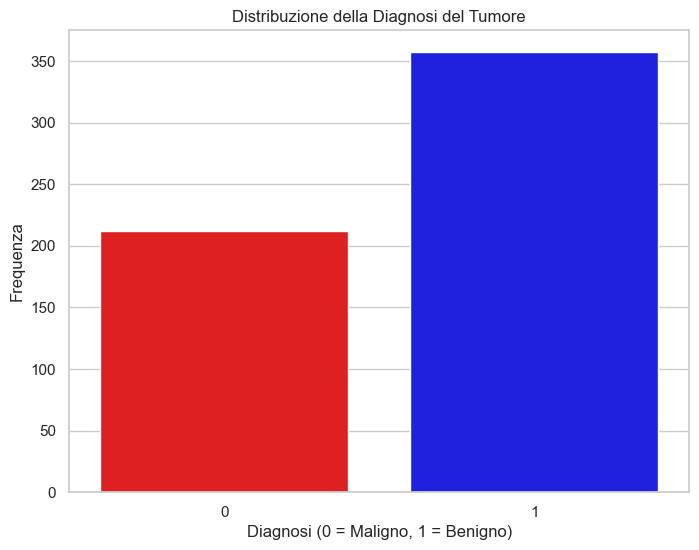

In [237]:
# Ottenere il conteggio e le percentuali per la variabile "target"
conteggio_percentuali = df['target'].value_counts(normalize=True) * 100

# Stampare le percentuali
print("Percentuali di diagnosi:")
print(conteggio_percentuali)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette=['red', 'blue'], hue='target', dodge=False, legend=False)
plt.title('Distribuzione della Diagnosi del Tumore')
plt.xlabel('Diagnosi (0 = Maligno, 1 = Benigno)')
plt.ylabel('Frequenza')
plt.show()

### 2.3 Matrice di Correlazione
La matrice di correlazione è un grafico che mostra le relazioni tra le variabili in un dataset. Permette di identificare facilmente le coppie di variabili che presentano una forte correlazione, sia positiva che negativa.

**Interpretazione:**

* **Colori:**
    * Rosso intenso: Correlazione positiva forte (le variabili aumentano o diminuiscono insieme).
    * Blu intenso: Correlazione negativa forte (le variabili aumentano in una direzione e diminuiscono nell'altra).
    * Bianco/grigio chiaro: Correlazione debole o assente (le variabili non mostrano una relazione lineare significativa).
* **Valori:** I numeri all'interno dei quadrati indicano il coefficiente di correlazione, che varia da -1 a 1.

**Cosa possiamo dedurre:**

* Identificare relazioni tra le variabili.
* Comprendere la direzione della relazione (positiva o negativa).
* Valutare l'intensità della relazione (forte o debole).

**Importante:**

* Correlazione non implica causazione.
* Interpretare nel contesto del dataset specifico.

**Osservazioni:**

* Alcune variabili sono fortemente correlate tra loro, come "mean radius" e "mean texture".
* Altre variabili non sono correlate tra loro, come "radius error" e "worst radius".





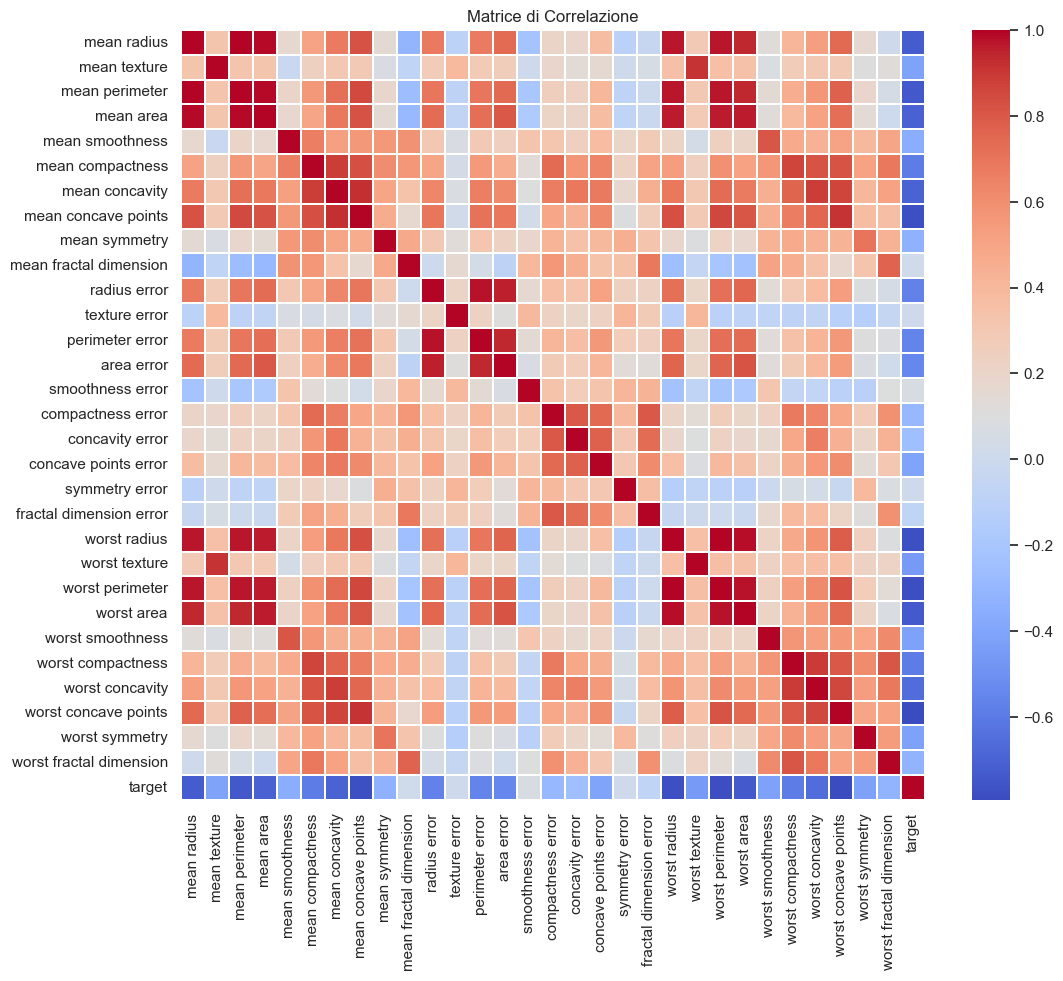

In [238]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Matrice di Correlazione')
plt.show()


### 2.4 Importanza delle Caratteristiche nel Dataset "Breast Cancer Wisconsin"

Questo grafico a barre rappresenta l'importanza delle caratteristiche nel dataset "Breast Cancer Wisconsin". L'importanza è stata calcolata utilizzando un algoritmo di Random Forest.

Le caratteristiche sono ordinate in base alla loro importanza, con la caratteristica più importante in alto. I valori di importanza sono rappresentati da barre colorate.

Dall'analisi del grafico è possibile osservare che alcune caratteristiche sono più importanti di altre per la classificazione dei tumori al seno. Quelle più importanti sono:

* **worst area**
* **worst concave points**
* **mean concave points**
* **worst radius**
* **worst perimeter**

Queste caratteristiche sono probabilmente quelle che forniscono più informazioni sulla natura del tumore e sulla sua probabilità di essere maligno.

L'analisi dell'importanza delle caratteristiche può essere utile per selezionare le caratteristiche più importanti da utilizzare in un modello di machine learning e per comprendere meglio i fattori che influenzano la classificazione dei tumori al seno.

Nei grafici successivi andremo ad analizzare queste 5 feature più importanti.


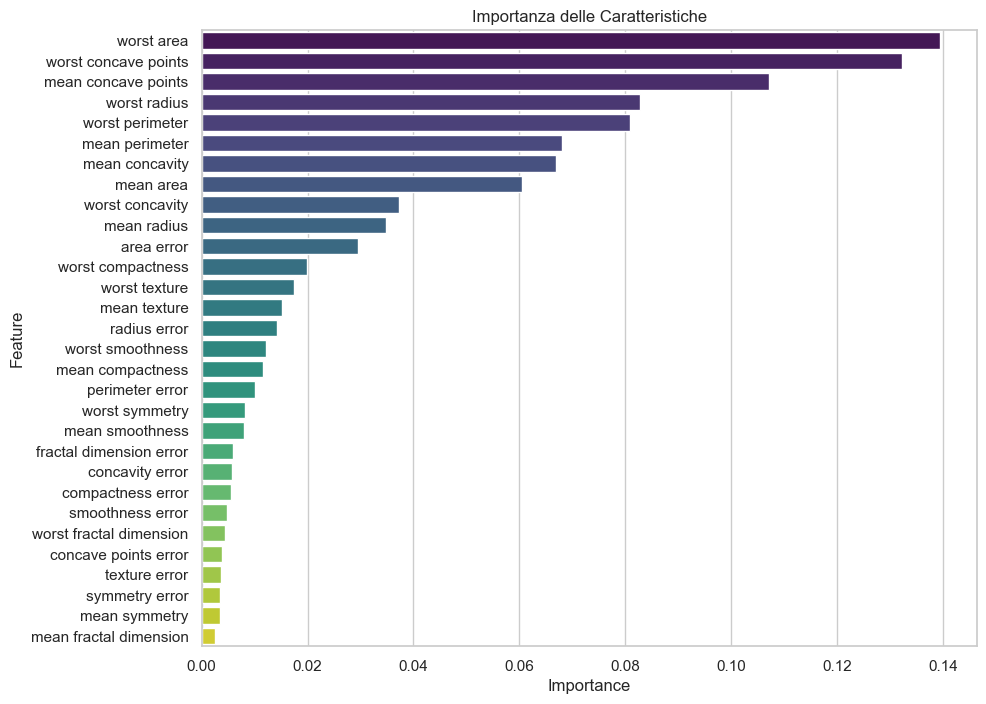

In [239]:
# Dividere i dati in caratteristiche (X) e target (y)
X = df.drop(columns=['target'])
y = df['target']

# Addestrare un modello di RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Ottenere l'importanza delle caratteristiche
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizzare l'importanza delle caratteristiche
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.title('Importanza delle Caratteristiche')
plt.show()


In [240]:
#Creo una lista con le prime 5 feature più importanti
topFeaturesByImportance = feature_importance_df[:5]['Feature'].values
print(topFeaturesByImportance)


['worst area' 'worst concave points' 'mean concave points' 'worst radius'
 'worst perimeter']


### 2.5 Distribuzione delle Caratteristiche più Importanti nel Dataset "Breast Cancer Wisconsin"

Questo set di istogrammi mostra la distribuzione delle cinque caratteristiche più importanti nel dataset "Breast Cancer Wisconsin". Le caratteristiche sono state identificate utilizzando un algoritmo di Random Forest nel precedente passaggio.

Ogni istogramma mostra la distribuzione di una caratteristica per i tumori benigni (colore rosso) e maligni (colore blu). La densità di probabilità è rappresentata da una curva tratteggiata.

**Interpretazione dettagliata:**
* Per tutti i grafici possiamo notare come la distribuzione sia piuttosto marcata tra i due tipi di tumore, infatti queste cinque feature non a caso sono considerate le più importanti, appunto per questa loro caratteristica, possiamo notare che a sinistra dei grafici è presente una concentrazione più marcata di tumori benigni, mentre a destra è presente una concentrazione più marcata di tumori maligni.
**Considerazioni generali:**

* L'analisi di questi istogrammi conferma che le **caratteristiche più importanti** per la classificazione dei tumori al seno sono quelle relative alla **forma e alla dimensione del tumore**. Queste caratteristiche presentano una distribuzione differenziata tra i tumori benigni e maligni, suggerendo che possono essere utilizzate per distinguere tra i due tipi di tumore.
* L'analisi della distribuzione delle caratteristiche può essere utile per:
    * Comprendere meglio la relazione tra le caratteristiche del tumore e la sua natura (benigno o maligno).
    * Identificare potenziali biomarcatori per la diagnosi precoce del cancro al seno.
    * Sviluppare algoritmi di machine learning più efficaci per la classificazione dei tumori al seno.



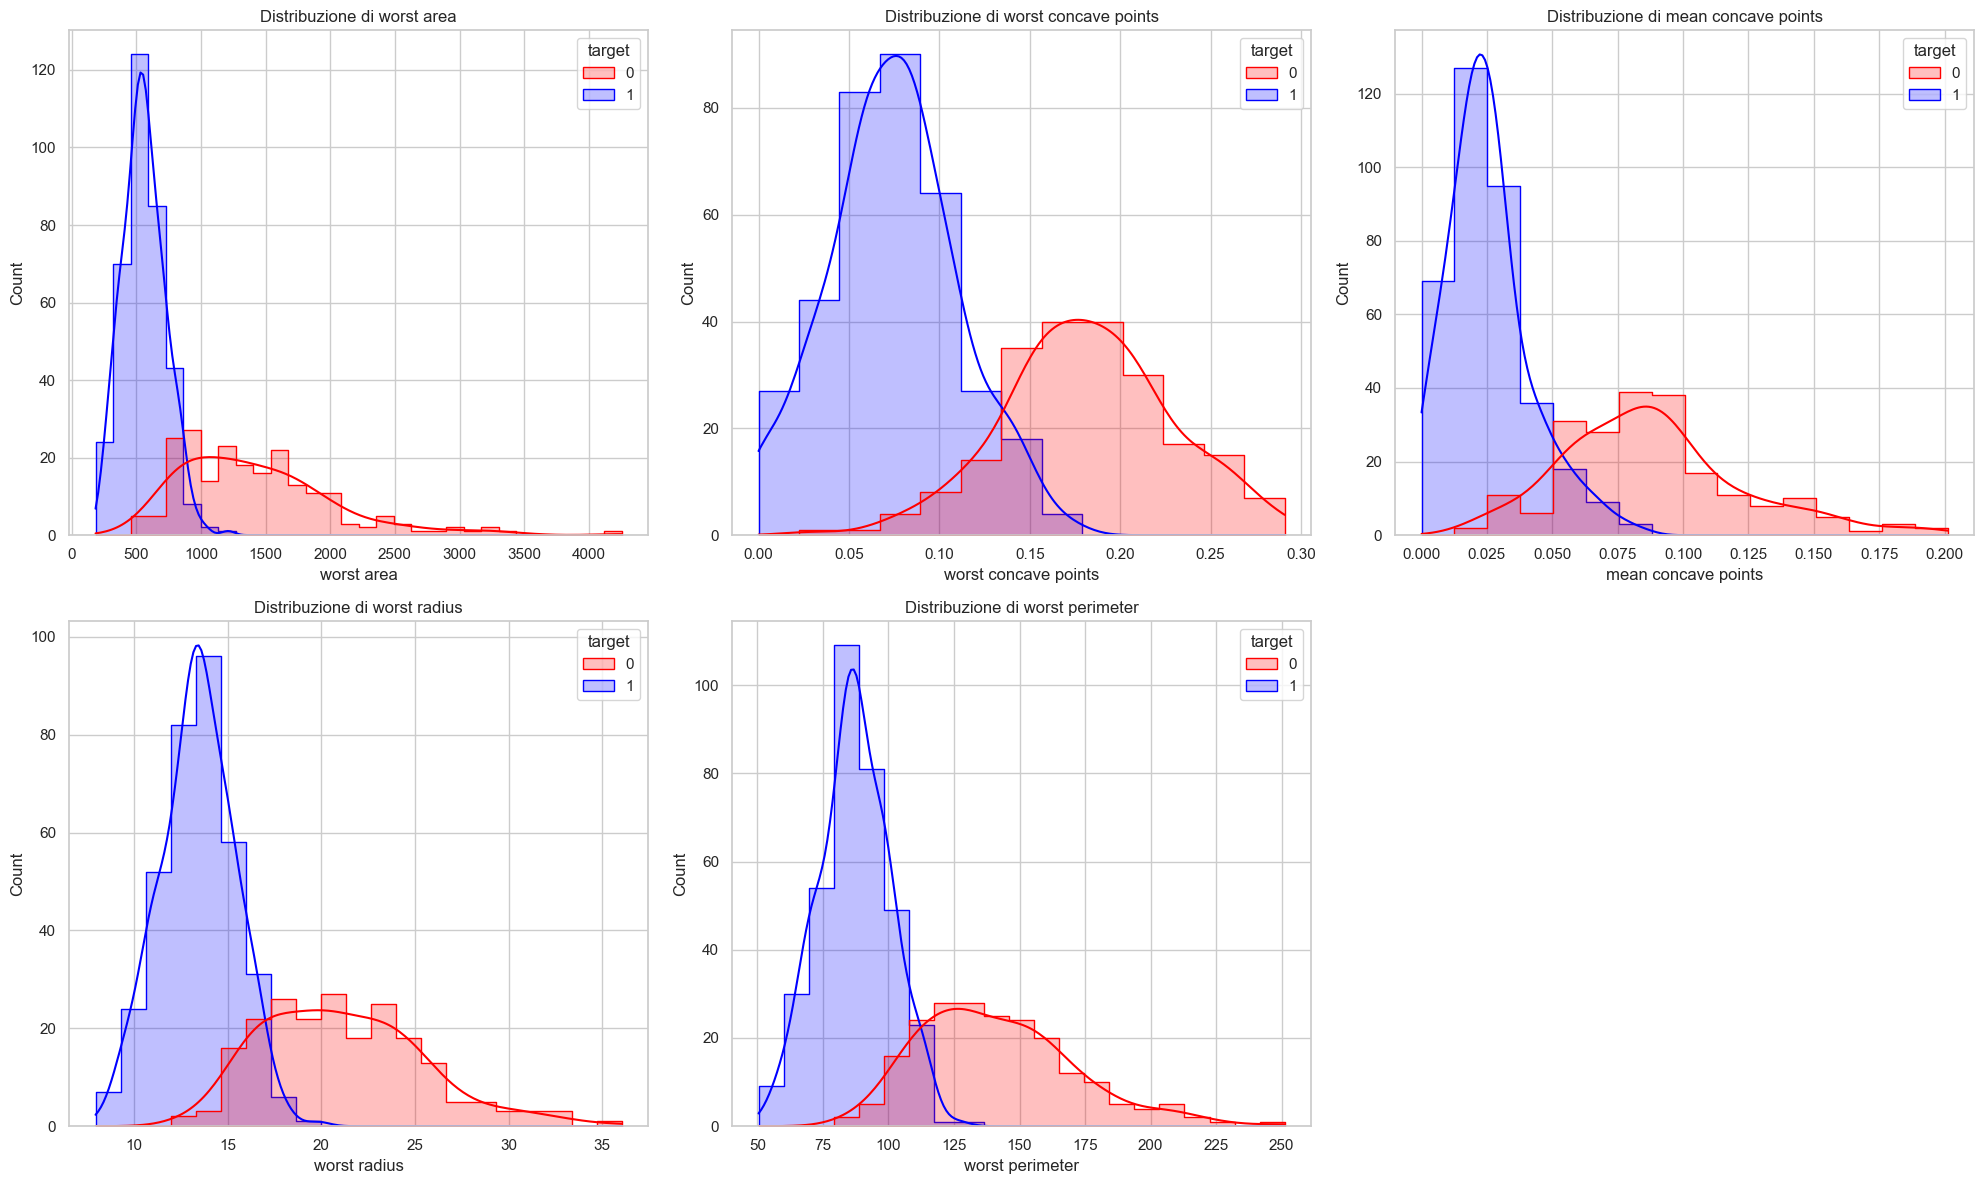

In [241]:
features = topFeaturesByImportance # Prendo le 5 feature più importanti

plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='target', element='step', palette=['red', 'blue'], kde=True)
    plt.title(f'Distribuzione di {feature}')

plt.tight_layout()
plt.show()

### 2.6 Box Plot delle Caratteristiche più Importanti nel Dataset "Breast Cancer Wisconsin"

L'immagine mostra una serie di box plot che rappresentano la distribuzione di diverse caratteristiche per due diversi obiettivi ("target"). I box plot sono suddivisi in due righe e tre colonne. Ogni box plot rappresenta la distribuzione di una singola caratteristica per un singolo obiettivo.

**Elementi del box plot:**

* **Scatola:** La scatola rappresenta la distribuzione centrale dei dati. La linea centrale all'interno della scatola rappresenta la mediana.
* **Whisker:** I baffi si estendono dalla scatola fino al massimo e al minimo valore dei dati che non sono considerati outlier.
* **Outlier:** I punti dati che si trovano al di fuori dei baffi sono considerati outlier e sono rappresentati da punti singoli.

**Interpretazione dei box plot:**

* **Posizione della mediana:** La posizione della mediana all'interno della scatola indica la simmetria della distribuzione dei dati. Se la mediana è al centro della scatola, la distribuzione è simmetrica. Se la mediana è spostata verso un bordo della scatola, la distribuzione è asimmetrica.


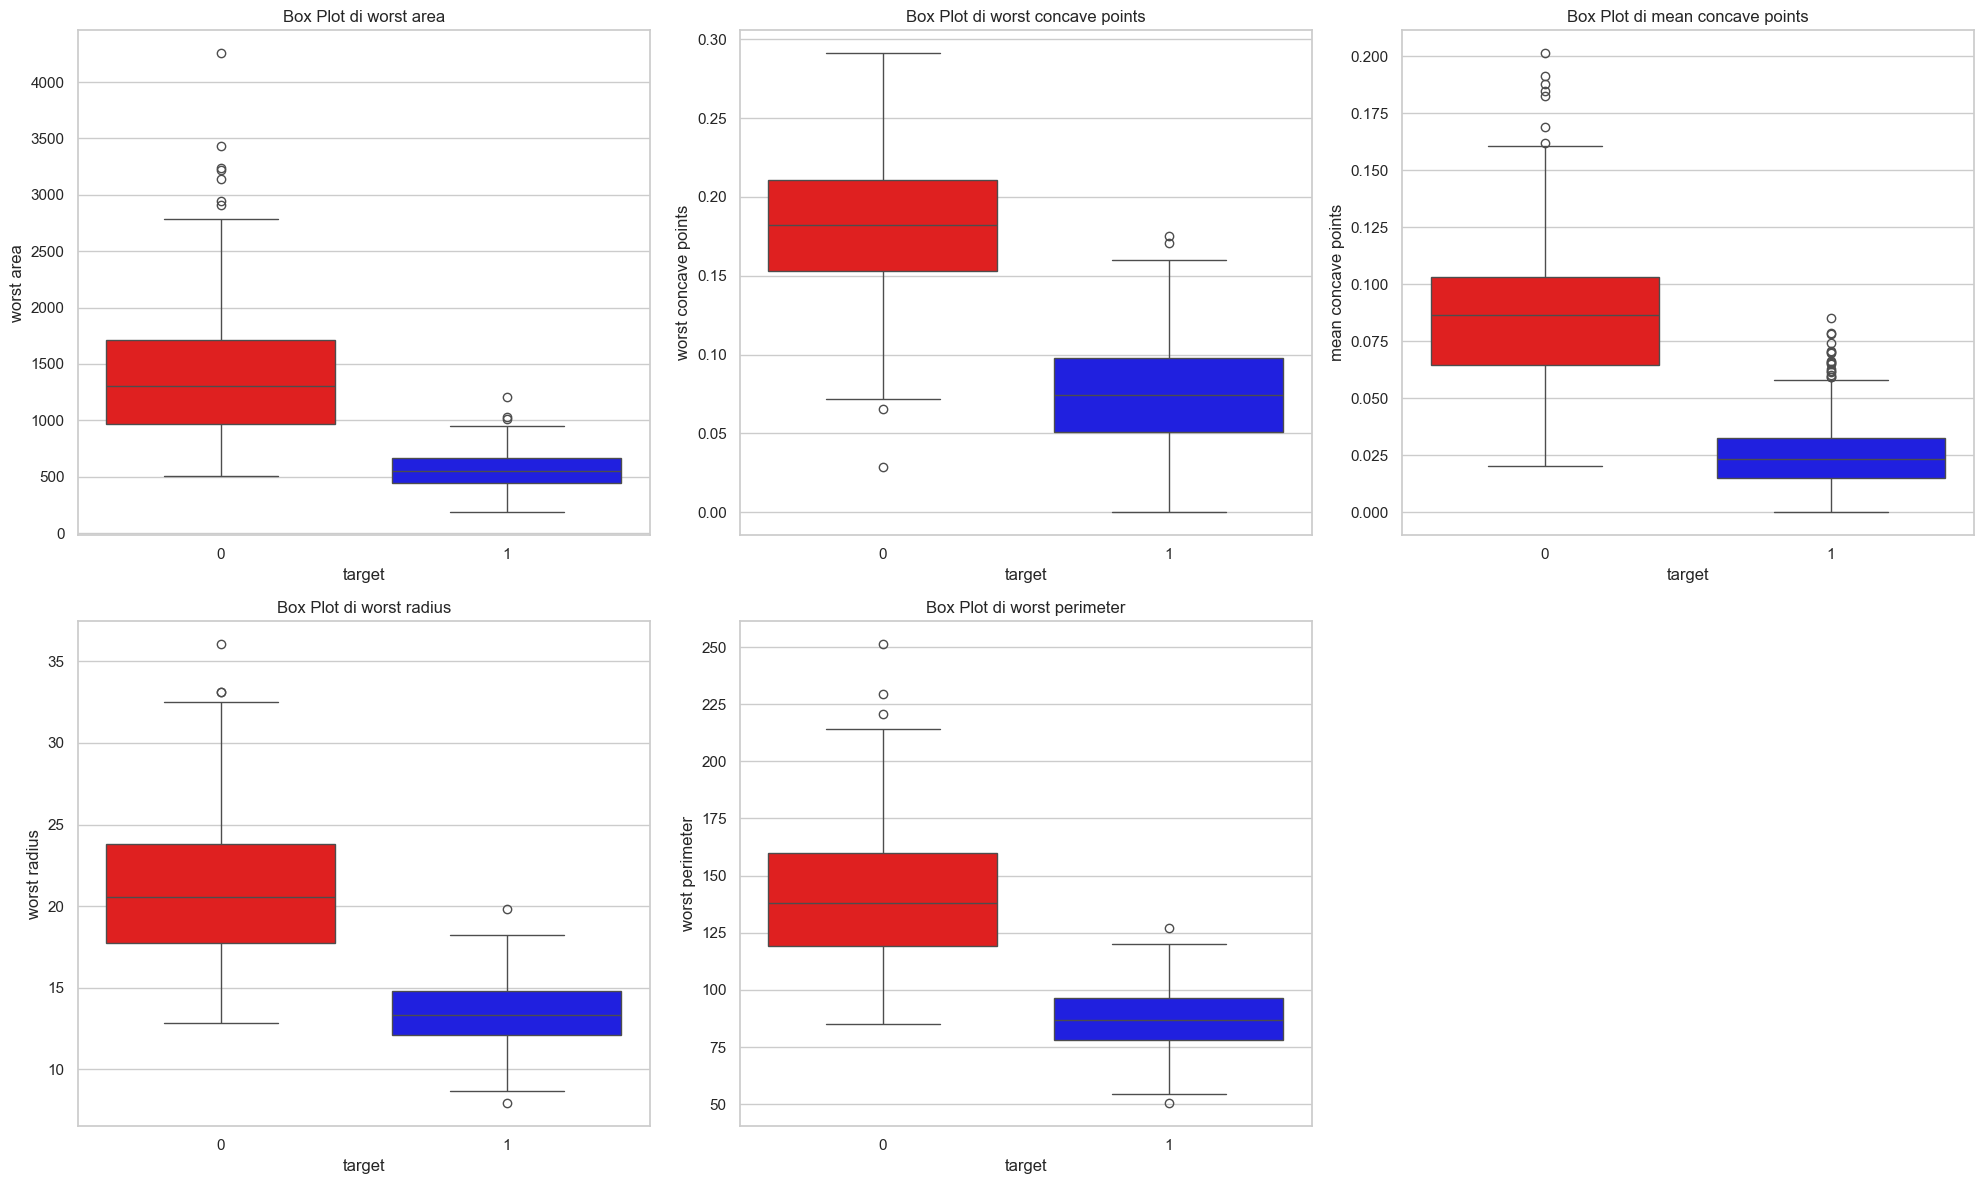

In [242]:
# Analisi esplorativa - Box Plot delle Caratteristiche
features = topFeaturesByImportance

plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette=['red', 'blue'], hue='target', dodge=False, legend=False)
    plt.title(f'Box Plot di {feature}')
plt.tight_layout()
plt.show()

## 3. Eseguo l'algoritmo Decision Tree senza rumore

### 3.1 Split del dataset
Abbiamo scelto di dividere il dataset in training set (70%) e test set (30%).

In [243]:
# Split del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensione del training set (70%):", X_train.shape)
print("Dimensione del test set (30%):", X_test.shape)

Dimensione del training set (70%): (398, 30)
Dimensione del test set (30%): (171, 30)


### 3.2 Distribuzione dei target positivi e negativi nei set di training e test
Nei grafici sopra riportati, possiamo osservare la distribuzione delle classi del target nei set di training e test. 

- **Training Set**: 
  - Classe `1`: Rappresenta il 37.4% dei dati del training set.
  - Classe `0`: Rappresenta il 62.6% dei dati del training set.

- **Test Set**: 
  - Classe `1`: Rappresenta il 36.8% dei dati del test set.
  - Classe `0`: Rappresenta il 63.2% dei dati del test set.

La distribuzione delle classi è simile tra i due set, con una leggera predominanza della classe `0` in entrambi. Questo indica che il campionamento casuale effettuato con `train_test_split` ha mantenuto una distribuzione proporzionale delle classi tra training e test set, garantendo una buona rappresentatività dei dati nel processo di validazione del modello.


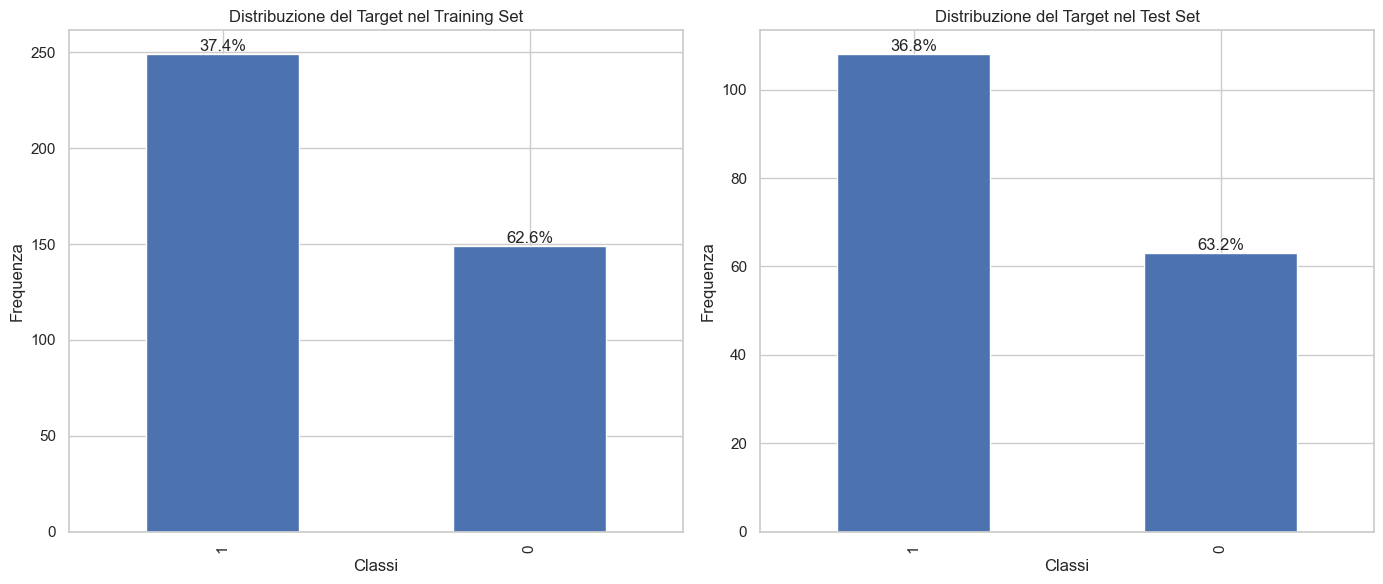

In [244]:
# Conta le occorrenze di ogni classe nel training set e nel test set
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Calcola le percentuali
train_percentages = (train_counts / train_counts.sum()) * 100
test_percentages = (test_counts / test_counts.sum()) * 100

# Crea una figura e assi per i due grafici
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Grafico per il training set
train_counts.plot(kind='bar', ax=ax[0])
for i, count in enumerate(train_counts):
    ax[0].text(i, count, f'{train_percentages[i]:.1f}%', ha='center', va='bottom')
ax[0].set_title('Distribuzione del Target nel Training Set')
ax[0].set_xlabel('Classi')
ax[0].set_ylabel('Frequenza')

# Grafico per il test set
test_counts.plot(kind='bar', ax=ax[1])
for i, count in enumerate(test_counts):
    ax[1].text(i, count, f'{test_percentages[i]:.1f}%', ha='center', va='bottom')
ax[1].set_title('Distribuzione del Target nel Test Set')
ax[1].set_xlabel('Classi')
ax[1].set_ylabel('Frequenza')

# Mostra i grafici
plt.tight_layout()
plt.show()


### 3.2 Modello Decision tree

#### 3.2.1 Addestramento del modello Decision tree

In [245]:
# Creiamo e addestriamo il modello di Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 3.2.2 Valutazione del modello SVM

In [246]:
#Avvio cronometro
start_time = time.time()

# Facciamo previsioni sul test set
y_pred = clf.predict(X_test)

#Stoppo cronometro
end_time = time.time()

# Valutiamo le performance del modello
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcola e stampa il classification report
class_report = classification_report(y_test, y_pred)

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

elapsed_time_notModifiedDataset = end_time - start_time
print(f"Tempo trascorso: {elapsed_time_notModifiedDataset:.4f} secondi")


Accuracy: 0.9415204678362573
Tempo trascorso: 0.0000 secondi


### 3.3 Valutazione della confusion matrix

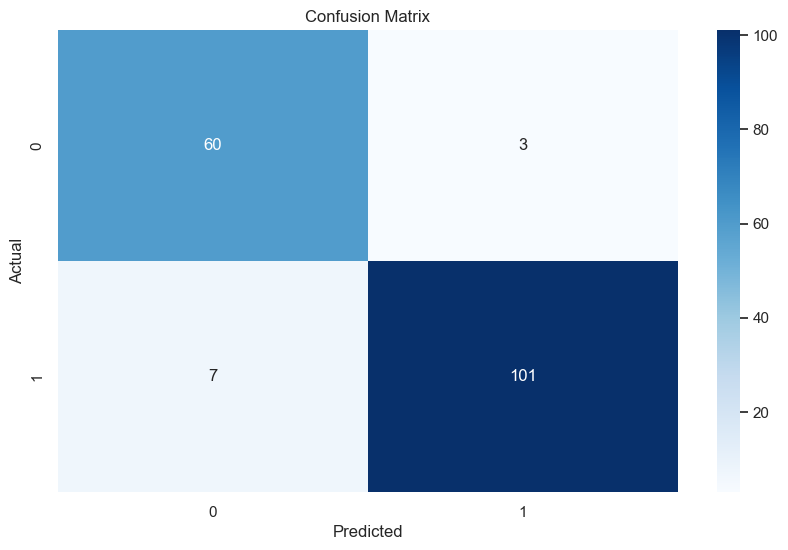

In [247]:
# Visualizza la matrice di confusione con seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3.4 Classification report

In [248]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## 4. Aggiunta di rumore al dataset

### 4.1 Metodo introduzione dati mancanti

In [249]:
def introduce_missing_data_custom(dataset, columns, percentage):
    """
    Introduce valori nulli in un dataset specificando le colonne e la percentuale di dati da annullare.

    :param dataset: DataFrame su cui operare.
    :param columns: Lista delle colonne su cui introdurre i valori nulli.
    :param percentage: Percentuale dei dati da annullare (0-1).
    :return: DataFrame modificato.
    """
    # Calcola il numero di righe da annullare in base alla percentuale
    num_rows_to_null = int(len(dataset) * percentage)

    # Seleziona casualmente le righe da annullare
    rows_to_null = np.random.choice(dataset.index, num_rows_to_null, replace=False)
    #print("Vado a sporcare queste righe: ", rows_to_null)
    
    # Imposta i valori a NaN per le colonne specificate nelle righe selezionate
    dataset.loc[rows_to_null, columns] = np.nan

    return dataset

### 4.2 Metodo introduzione outliers

In [250]:
def introduce_outliers(dataset, columns, percentage):
    """
    Introduce outliers in un dataset specificando le colonne e la percentuale di dati da modificare.

    :param dataset: DataFrame su cui operare.
    :param columns: Lista delle colonne su cui introdurre gli outliers.
    :param percentage: Percentuale dei dati da modificare (0-1).
    :return: DataFrame modificato.
    """
    # Calcola il numero di righe da modificare in base alla percentuale
    num_rows_to_change = int(len(dataset) * percentage)

    # Seleziona casualmente le righe da modificare
    rows_to_change = np.random.choice(dataset.index, num_rows_to_change, replace=False)
    #print("Vado a modificare queste righe: ", rows_to_change)

    # Per ogni riga selezionata, aggiungi un outlier alle colonne specificate
    for idx in rows_to_change:
        for column in columns:
            # Calcola un outlier come media + 5 * deviazione standard della colonna
            outlier_value = dataset[column].mean() + 5 * dataset[column].std()
            dataset.at[idx, column] = outlier_value

    return dataset

### 4.3 Metodo introduzione righe duplicate

In [251]:
def introduce_duplicate_rows(dataset, percentage, y_train_spor):
    """
    Introduce righe duplicate in un dataset specificando la percentuale di righe da duplicare.
    Duplica anche le etichette corrispondenti in y_train_sporcata.

    :param dataset: DataFrame su cui operare.
    :param percentage: Percentuale di righe da duplicare (0-1).
    :param y_train_sporcata: Serie delle etichette corrispondenti.
    :return: DataFrame e Serie modificati.
    """
    # Calcola il numero di righe da duplicare in base alla percentuale
    num_rows_to_duplicate = int(len(dataset) * percentage)

    # Seleziona casualmente le righe da duplicare
    rows_to_duplicate = np.random.choice(dataset.index, num_rows_to_duplicate, replace=False)

    # Duplica le righe selezionate
    duplicated_rows = dataset.loc[rows_to_duplicate]
    dataset = pd.concat([dataset, duplicated_rows], ignore_index=True)

    # Duplica le etichette corrispondenti
    duplicated_labels = y_train_spor.loc[rows_to_duplicate]
    y_train_spor = pd.concat([y_train_spor, duplicated_labels], ignore_index=True)

    return dataset, y_train_spor

In [252]:
def plot_feature_distribution_comparison(clean_df, noisy_df, feature_columns, top5Feature):
    """
    Confronta graficamente la distribuzione delle feature tra il dataset pulito e quello sporcato.

    :param clean_df: DataFrame del dataset pulito.
    :param noisy_df: DataFrame del dataset sporcato.
    :param feature_columns: Colonne delle feature da confrontare.
    :param top5Feature: Lista delle top 5 feature da mostrare.
    """
    # Crea copie dei DataFrame per evitare di modificare gli originali
    clean_df_copy = clean_df.copy()
    noisy_df_copy = noisy_df.copy()

    # Aggiungi una colonna per indicare lo stato (pulito o sporcato)
    clean_df_copy['status'] = 'clean'
    noisy_df_copy['status'] = 'noisy'

    # Seleziona solo le colonne delle top 5 feature
    feature_columns_to_plot = [col for col in feature_columns if col in top5Feature]

    # Concatena i due dataset
    combined_df = pd.concat([clean_df_copy, noisy_df_copy], ignore_index=True)

    # Calcola il numero di righe e colonne dei subplot in base al numero di feature da plottare
    num_features = len(feature_columns_to_plot)
    num_rows = (num_features + 2) // 3  # Calcola il numero di righe necessarie (3 colonne per riga)

    # Plotting
    plt.figure(figsize=(15, 5 * num_rows))  # Altezza ridotta per ridurre la dimensione complessiva del grafico
    sns.set(style="whitegrid")

    for i, column in enumerate(feature_columns_to_plot, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x='status', y=column, data=combined_df)
        plt.title(column)
        plt.tight_layout()

    plt.suptitle('Confronto tra Dataset Pulito e Sporcato', y=1.02, fontsize=16, ha='center')
    plt.show()

## 5. Esecuzione dell'algoritmo Decision Tree con rumore dinamico dal 10% al 100%
Il rumore viene introdotto sul dataset X_test, che abbiamo creato in precedenza e solo sulle top 5 colonne più importanti che vengono calcolate ad inizio notebook nel paragrafo 2.4.

In [253]:
percentuali_rumore = [0.1,0.3,0.5,1]

### 5.1 Esecuzione Decision Tree con aggiunta di valori nulli

In [254]:
metricsNUll = {'percentuale': [], 'accuracy': [], 'f1_score': [], 'precision': [], 'recall': []}
datasetSporcatoNULL = {'percentuale': [], 'dataset': []}

for percentuale in percentuali_rumore:
    dataset_test_sporcato = X_train.copy()
    datasetSporcatoNULL['dataset'].append(dataset_test_sporcato)
    datasetSporcatoNULL['percentuale'].append(percentuale*100)

    dataset_sporcato = introduce_missing_data_custom(dataset_test_sporcato, topFeaturesByImportance, percentuale)  # Funzione che introduce rumore nel dataset

    # Creiamo e addestriamo il modello di Decision Tree con il dataset sporco
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(dataset_sporcato, y_train)

    # Effettua le previsioni sui dati di test
    y_pred = clf.predict(X_test)

    # Calcola le metriche di performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Salva le metriche
    metricsNUll['percentuale'].append(percentuale)
    metricsNUll['accuracy'].append(accuracy)
    metricsNUll['f1_score'].append(f1)
    metricsNUll['precision'].append(precision)
    metricsNUll['recall'].append(recall)
    
    print(f'Percentuale di rumore: {percentuale}. Accuracy: {accuracy}')



Percentuale di rumore: 0.1. Accuracy: 0.9532163742690059
Percentuale di rumore: 0.3. Accuracy: 0.9122807017543859
Percentuale di rumore: 0.5. Accuracy: 0.935672514619883
Percentuale di rumore: 1. Accuracy: 0.9122807017543859


### 5.2 Esecuzione Decision Tree con aggiunta di outliers

Percentuale di rumore: 0.1. Accuracy: 0.9415204678362573


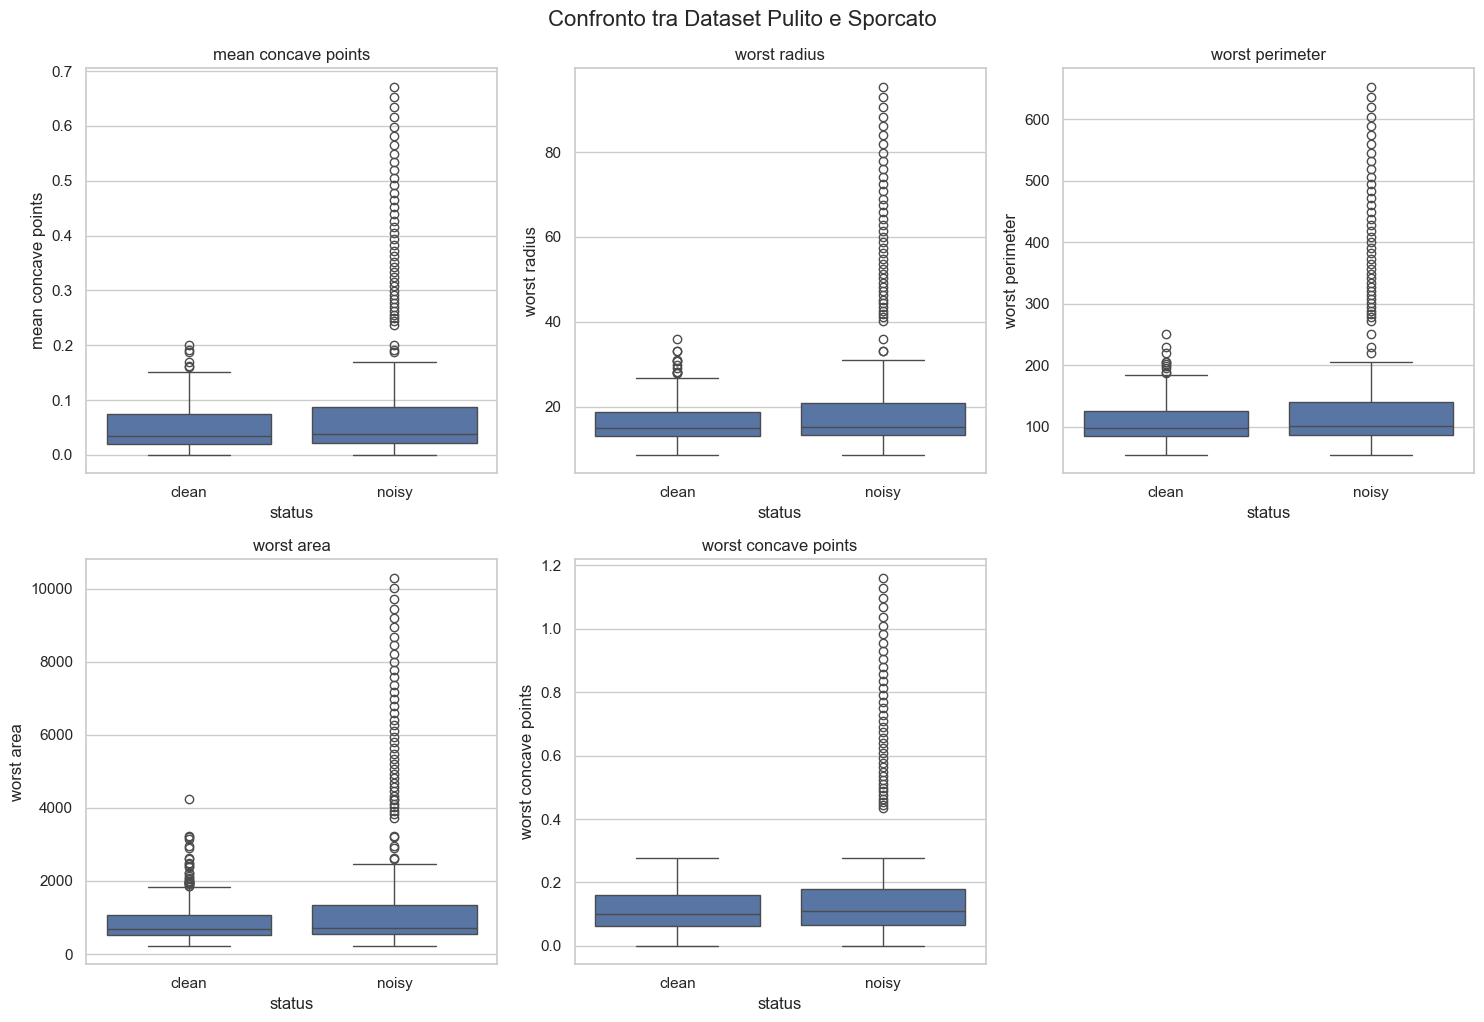

Percentuale di rumore: 0.3. Accuracy: 0.9005847953216374


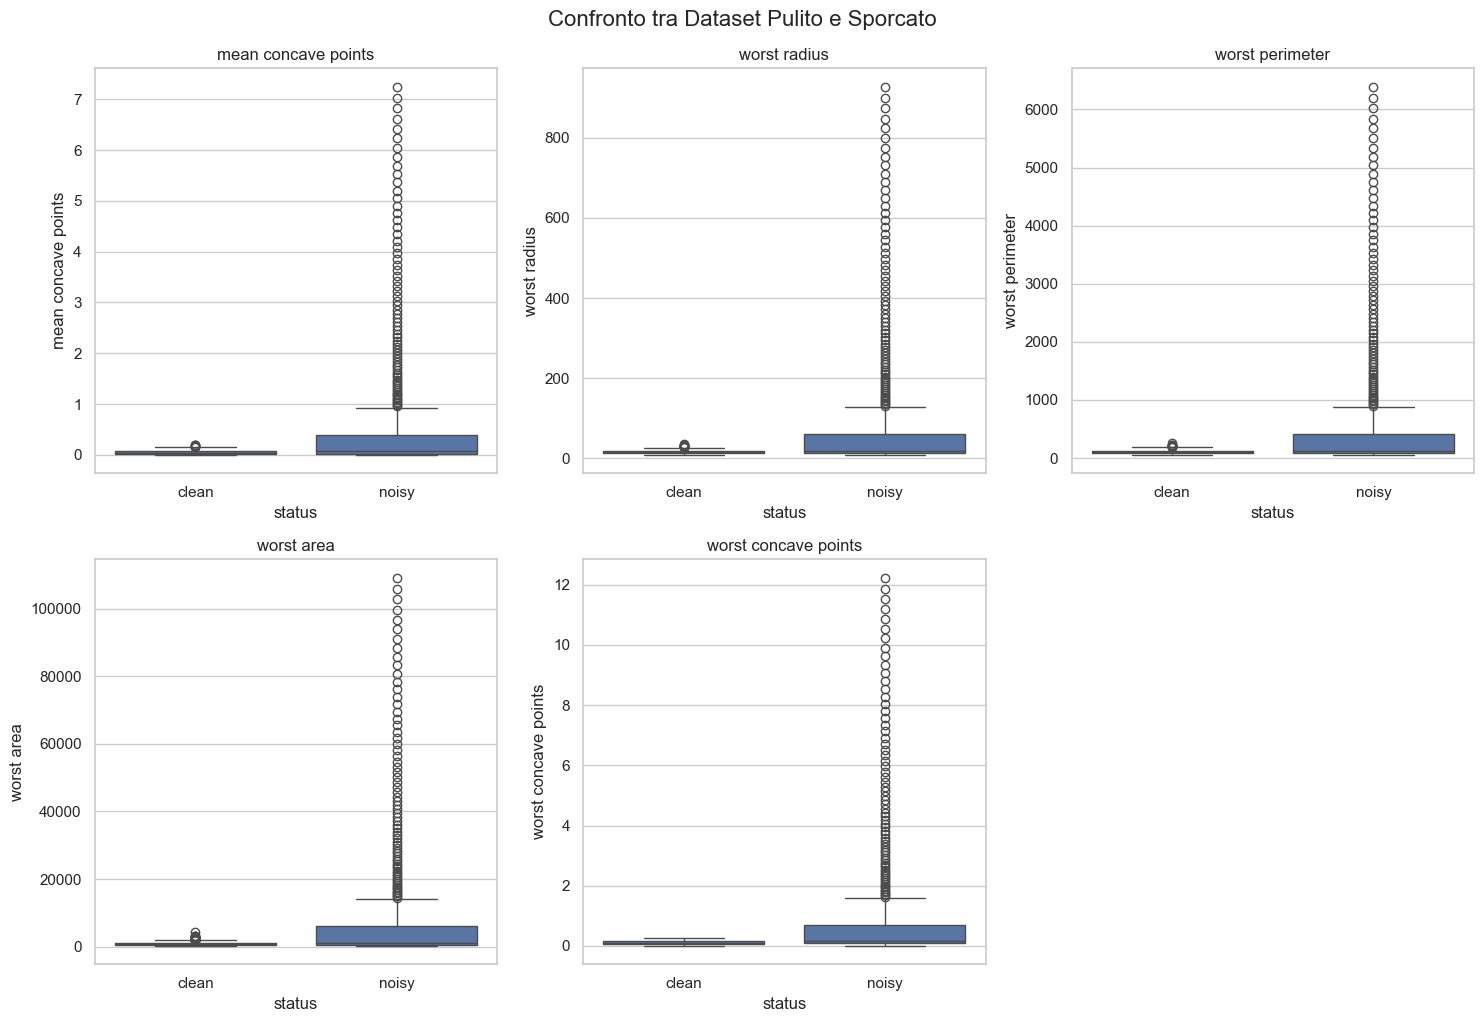

Percentuale di rumore: 0.5. Accuracy: 0.8947368421052632


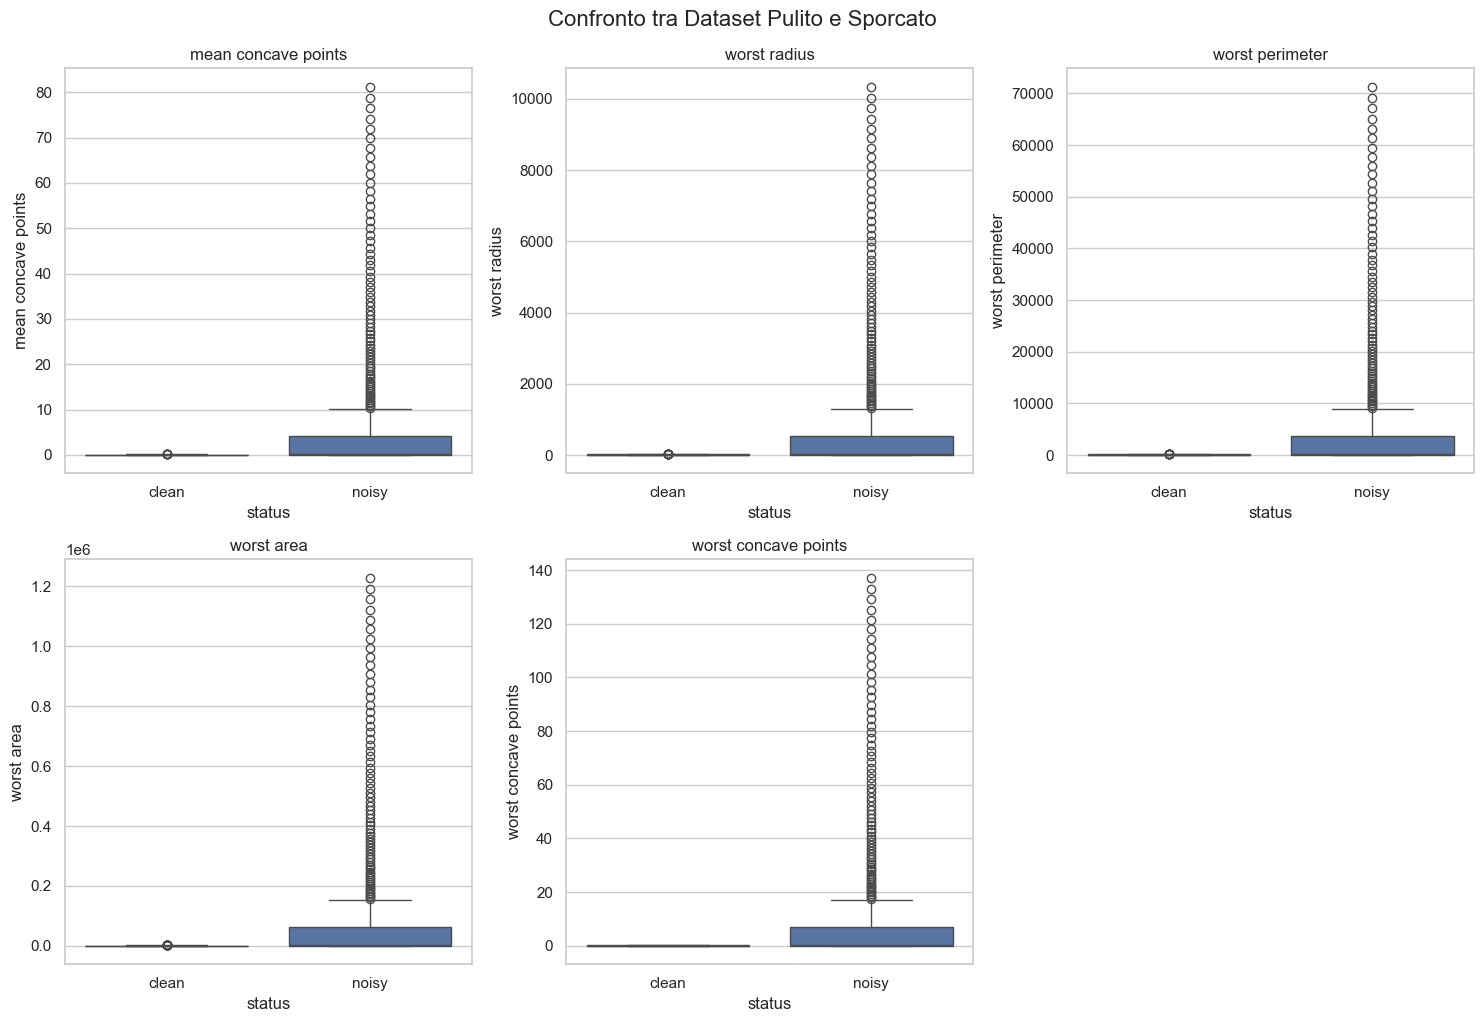

Percentuale di rumore: 1. Accuracy: 0.9005847953216374


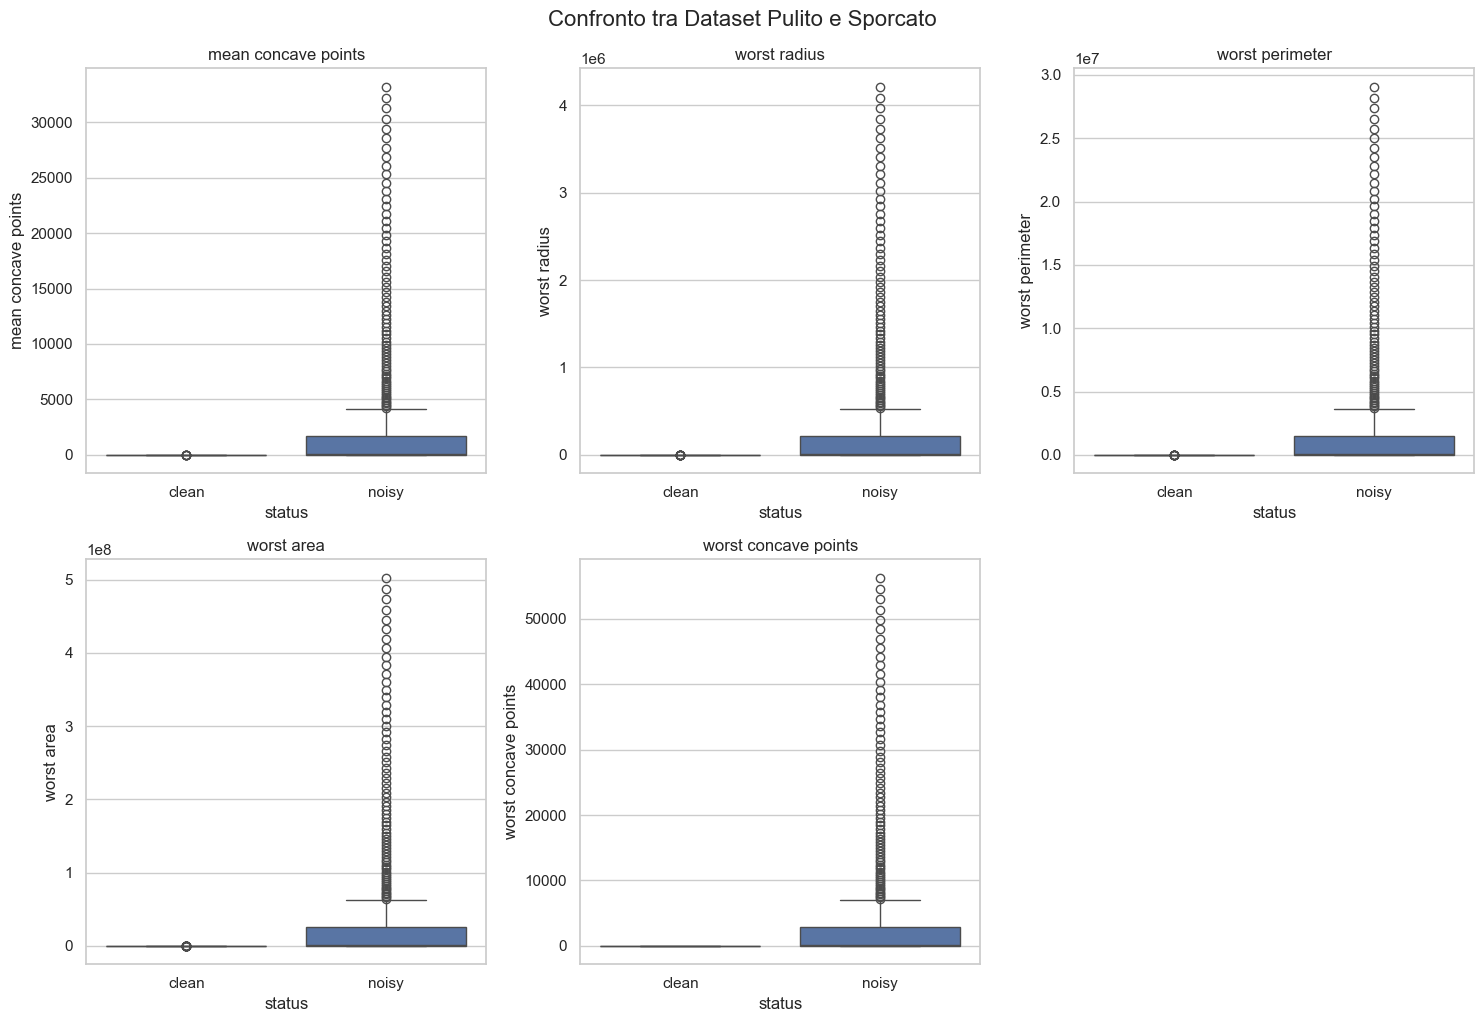

In [255]:
metricsOuliers = {'percentuale': [], 'accuracy': [], 'f1_score': [], 'precision': [], 'recall': []}
datasetSporcatoOutliers = {'percentuale': [], 'dataset': []}


for percentuale in percentuali_rumore:
    dataset_test_sporcato = X_train.copy()

    datasetSporcatoOutliers['dataset'].append(dataset_test_sporcato)
    datasetSporcatoOutliers['percentuale'].append(percentuale*100)

    dataset_sporcato = introduce_outliers(dataset_test_sporcato, topFeaturesByImportance, percentuale)  # Funzione che introduce rumore nel dataset

    # Creiamo e addestriamo il modello di Decision Tree con il dataset sporco
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(dataset_sporcato, y_train)

    # Effettua le previsioni sui dati di test
    y_pred = clf.predict(X_test)

    # Calcola le metriche di performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Salva le metriche
    metricsOuliers['percentuale'].append(percentuale)
    metricsOuliers['accuracy'].append(accuracy)
    metricsOuliers['f1_score'].append(f1)
    metricsOuliers['precision'].append(precision)
    metricsOuliers['recall'].append(recall)

    print(f'Percentuale di rumore: {percentuale}. Accuracy: {accuracy}')

    # Chiamata alla funzione di plot per confrontare le distribuzioni delle feature
    plot_feature_distribution_comparison(X_train, dataset_sporcato, X.columns, topFeaturesByImportance)

### 5.3 Esecuzione Decision Tree con aggiunta di righe duplicate

Percentuale di rumore: 0.1. Accuracy: 0.9473684210526315


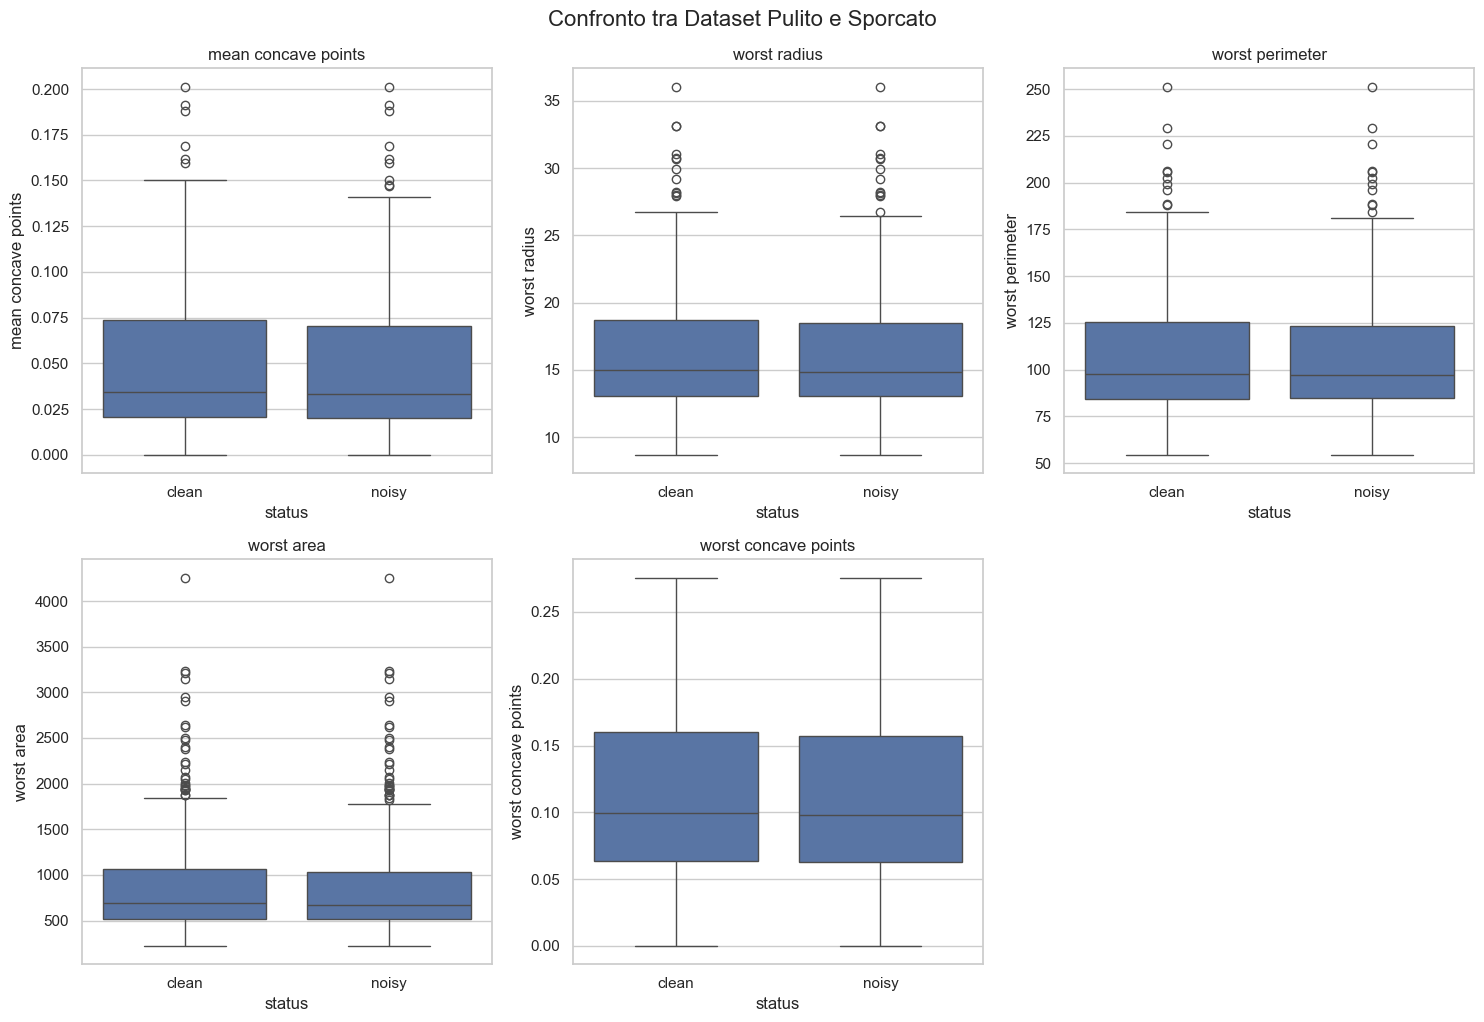

Percentuale di rumore: 0.3. Accuracy: 0.9298245614035088


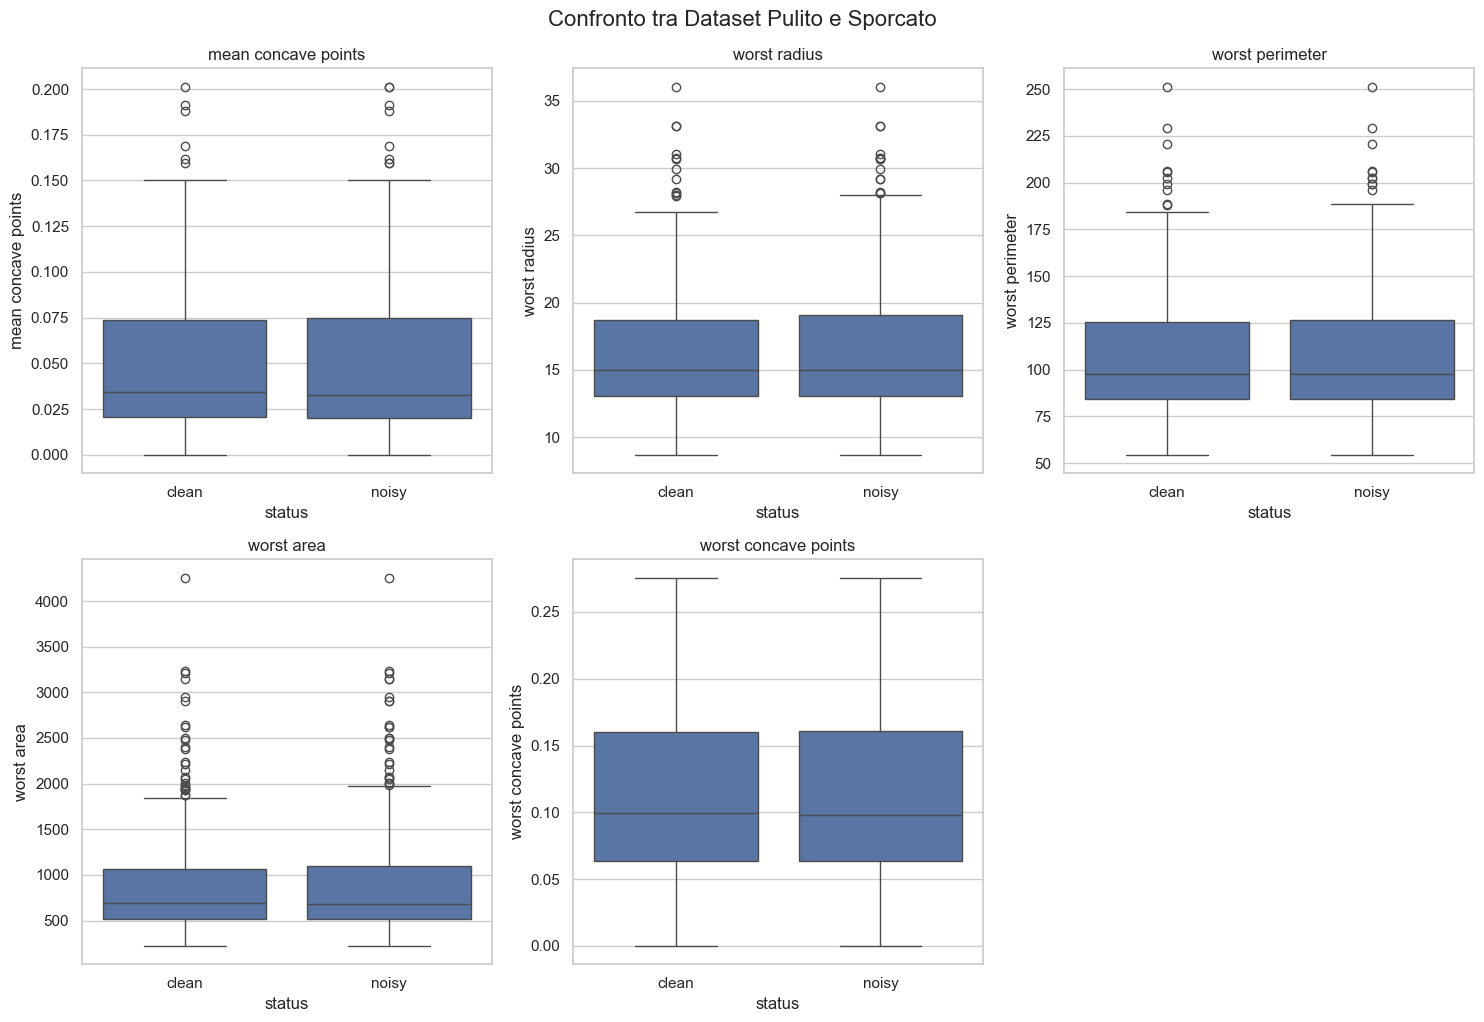

Percentuale di rumore: 0.5. Accuracy: 0.9181286549707602


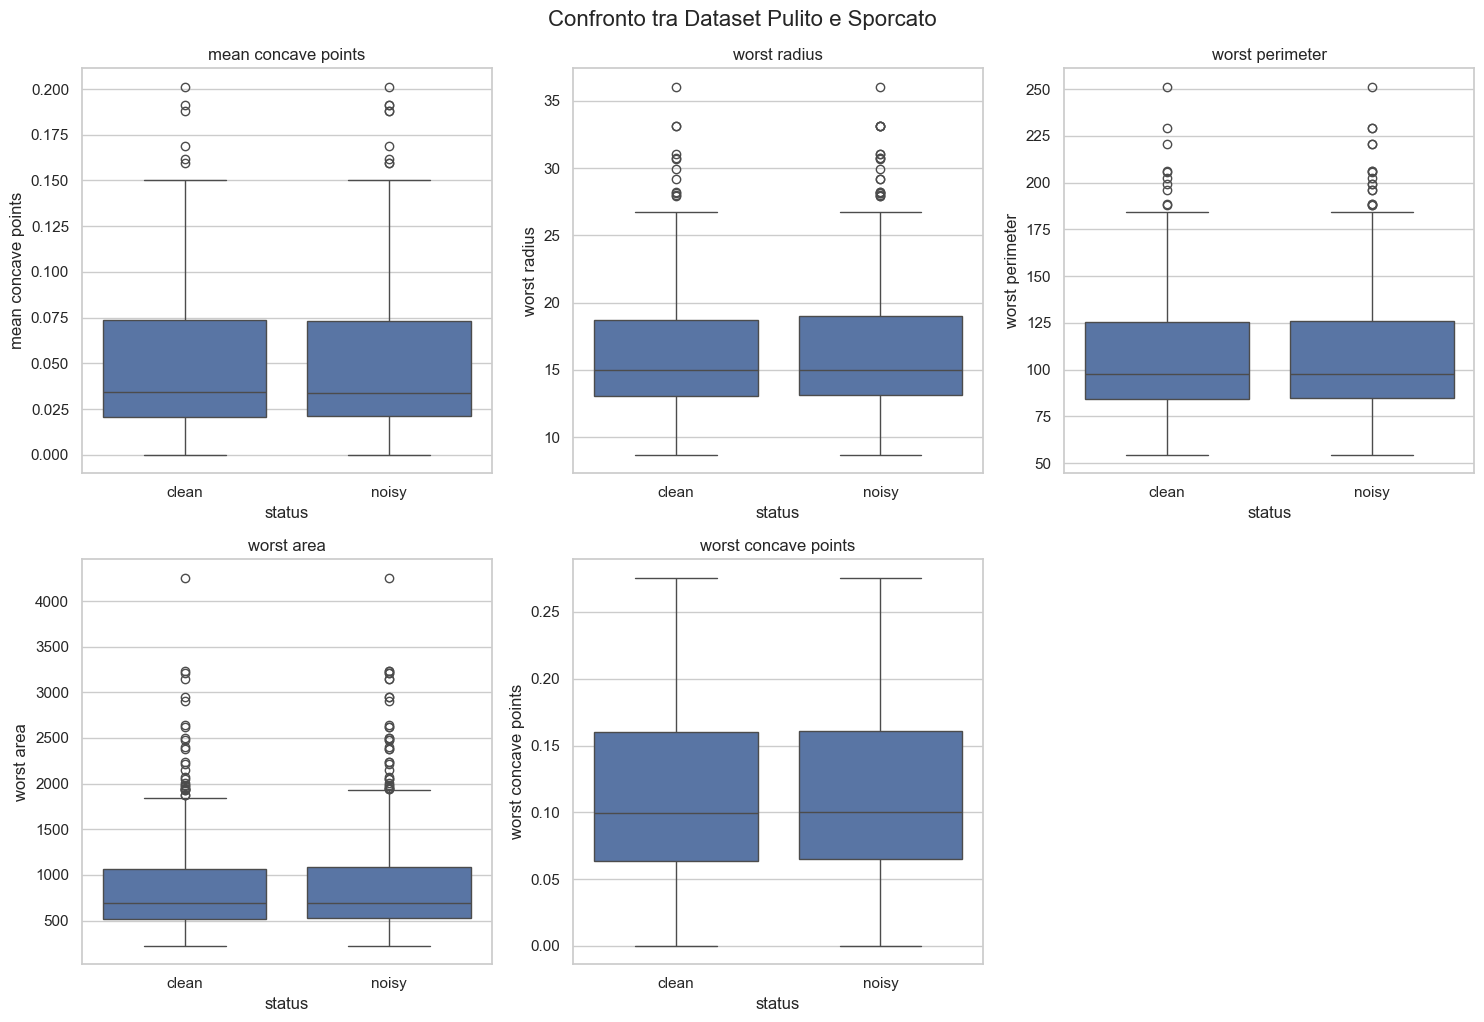

Percentuale di rumore: 1. Accuracy: 0.9415204678362573


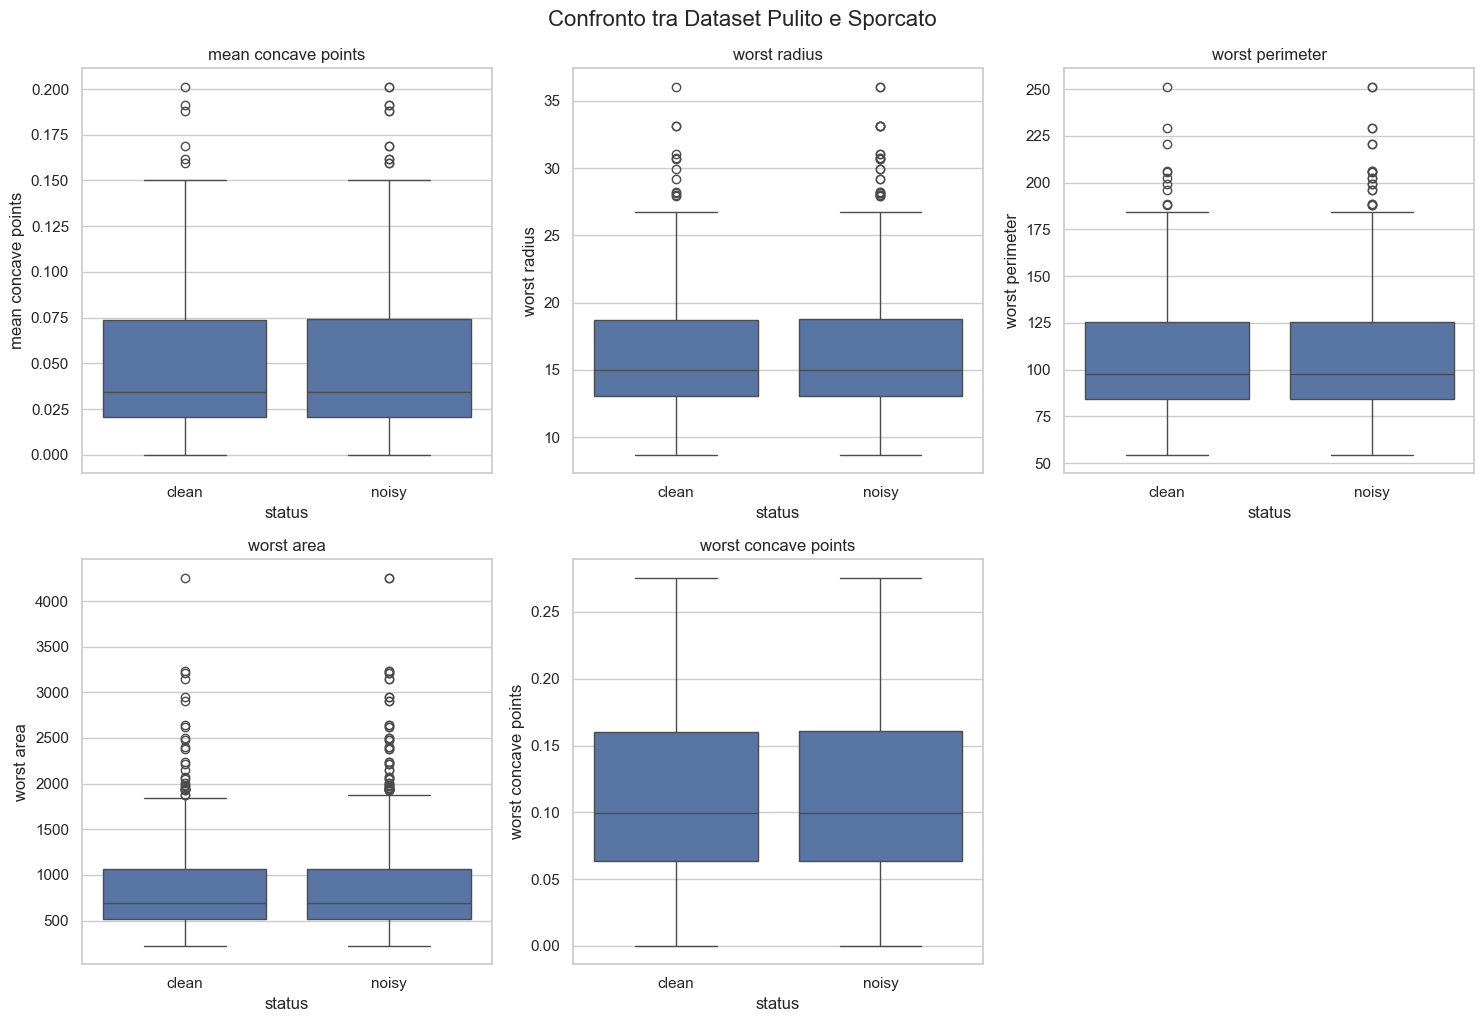

In [256]:
metricsDuplicate = {'percentuale': [], 'accuracy': [], 'f1_score': [], 'precision': [], 'recall': []}
datasetSporcatoDuplicate = {'percentuale': [], 'dataset': []}


for percentuale in percentuali_rumore:
    dataset_test_sporcato = X_train.copy()
    y_train_sporcata = y_train.copy()

    datasetSporcatoDuplicate['dataset'].append(dataset_test_sporcato)
    datasetSporcatoDuplicate['percentuale'].append(percentuale*100)
    
    dataset_sporcato, y_train_sporcata = introduce_duplicate_rows(dataset_test_sporcato, percentuale, y_train_sporcata)  # Funzione che introduce rumore nel dataset

    # Creiamo e addestriamo il modello di Decision Tree con il dataset sporco
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(dataset_sporcato, y_train_sporcata)

    # Effettua le previsioni sui dati di test
    y_pred = clf.predict(X_test)

    # Calcola le metriche di performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Salva le metriche
    metricsDuplicate['percentuale'].append(percentuale)
    metricsDuplicate['accuracy'].append(accuracy)
    metricsDuplicate['f1_score'].append(f1)
    metricsDuplicate['precision'].append(precision)
    metricsDuplicate['recall'].append(recall)

    print(f'Percentuale di rumore: {percentuale}. Accuracy: {accuracy}')

    # Chiamata alla funzione di plot per confrontare le distribuzioni delle feature
    plot_feature_distribution_comparison(X_train, dataset_sporcato, X.columns, topFeaturesByImportance)

## 6. Conclusione e grafici riassuntivi

### 6.1 Grafico Decision Tree con valori nulli

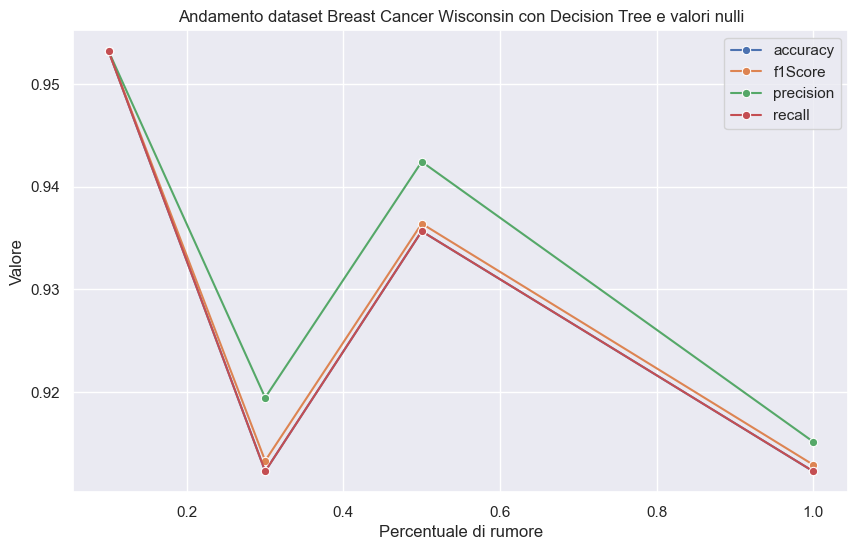

In [257]:
# Converti il dizionario in DataFrame
metrics_df = pd.DataFrame(metricsNUll)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(data=metrics_df, x='percentuale', y='accuracy', label='accuracy', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='f1_score', label='f1Score', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='precision', label='precision', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='recall', label='recall', marker='o')

plt.title('Andamento dataset Breast Cancer Wisconsin con Decision Tree e valori nulli')
plt.xlabel('Percentuale di rumore')
plt.ylabel('Valore')
plt.legend()
plt.show()

### 6.2 Grafico Decision Tree con outliers

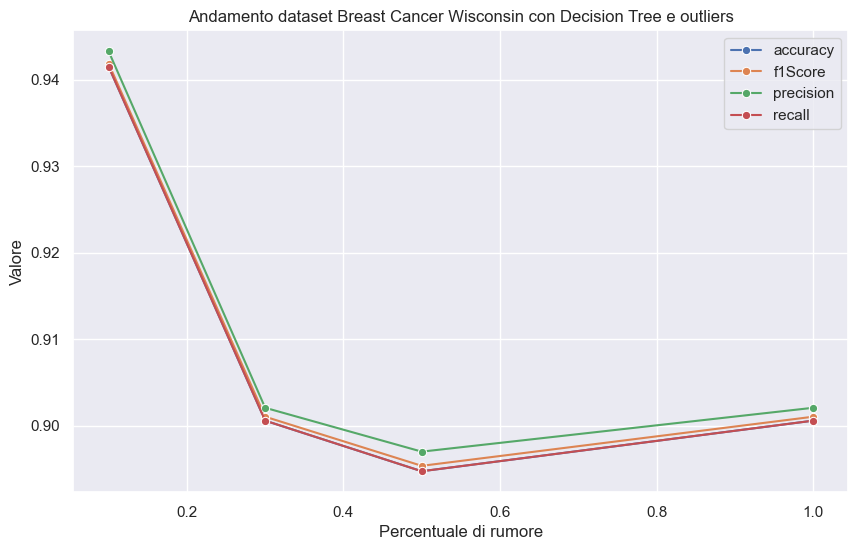

In [258]:
# Converti il dizionario in DataFrame
metrics_df = pd.DataFrame(metricsOuliers)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(data=metrics_df, x='percentuale', y='accuracy', label='accuracy', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='f1_score', label='f1Score', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='precision', label='precision', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='recall', label='recall', marker='o')

plt.title('Andamento dataset Breast Cancer Wisconsin con Decision Tree e outliers')
plt.xlabel('Percentuale di rumore')
plt.ylabel('Valore')
plt.legend()
plt.show()

### 6.3 Grafico Decision Tree con righe duplicate

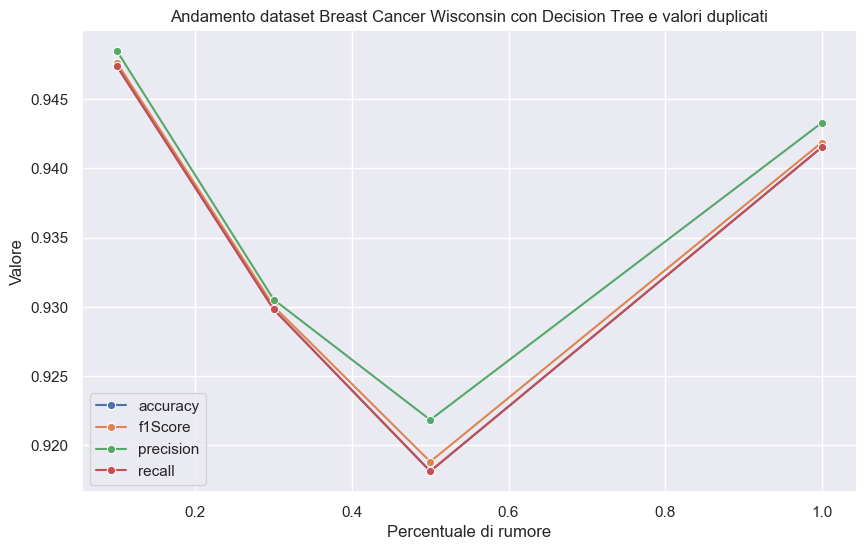

In [259]:
# Converti il dizionario in DataFrame
metrics_df = pd.DataFrame(metricsDuplicate)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(data=metrics_df, x='percentuale', y='accuracy', label='accuracy', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='f1_score', label='f1Score', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='precision', label='precision', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='recall', label='recall', marker='o')

plt.title('Andamento dataset Breast Cancer Wisconsin con Decision Tree e valori duplicati')
plt.xlabel('Percentuale di rumore')
plt.ylabel('Valore')
plt.legend()
plt.show()

### 6.4 Curva ROC

In [260]:
#TODO: Implementare CURVA ROC per tutti i modelli (AUC)
#variabile contenente tutti i dataset sporcati: datasetSporcatoNULL["dataset"], datasetSporcatoOutliers["dataset"], datasetSporcatoDuplicate["dataset"]

### 6.5 Feature più importanti per ogni percentuale e per ogni rumore

In [261]:
#TODO: Implementare grafico per feature più importanti per ogni percentuale e per ogni rumore
#variabile contenente tutti i dataset sporcati: datasetSporcatoNULL["dataset"], datasetSporcatoOutliers["dataset"], datasetSporcatoDuplicate["dataset"]

### 6.6 Distribuzione per ogni feature 

#### 6.6.1 Distribuzione per ogni feature con valori nulli

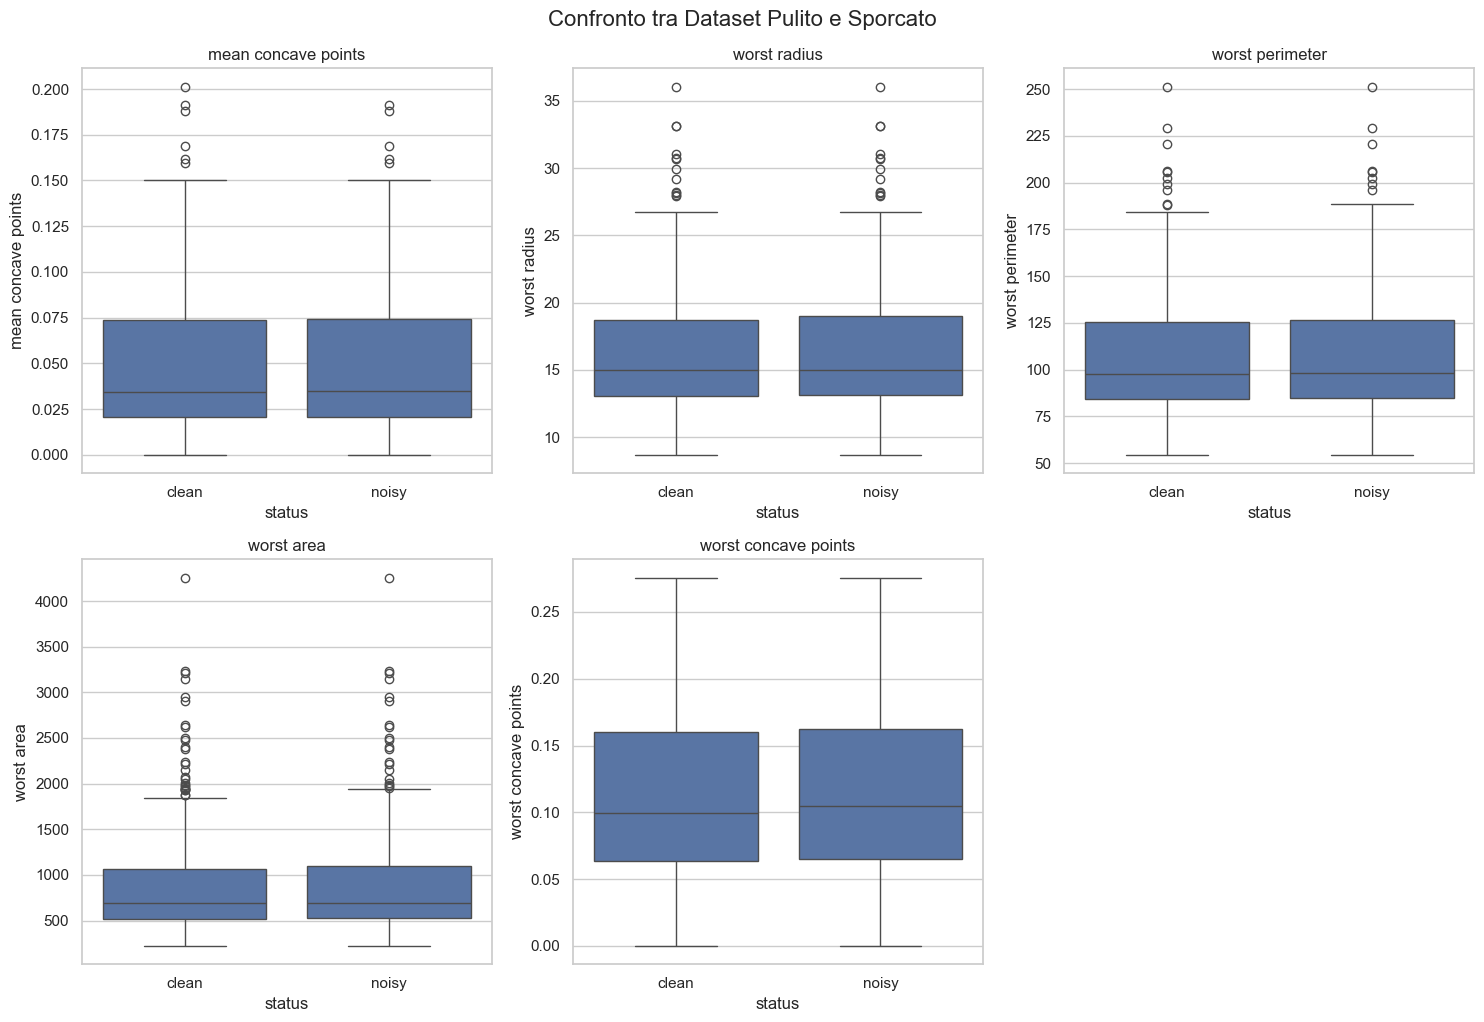

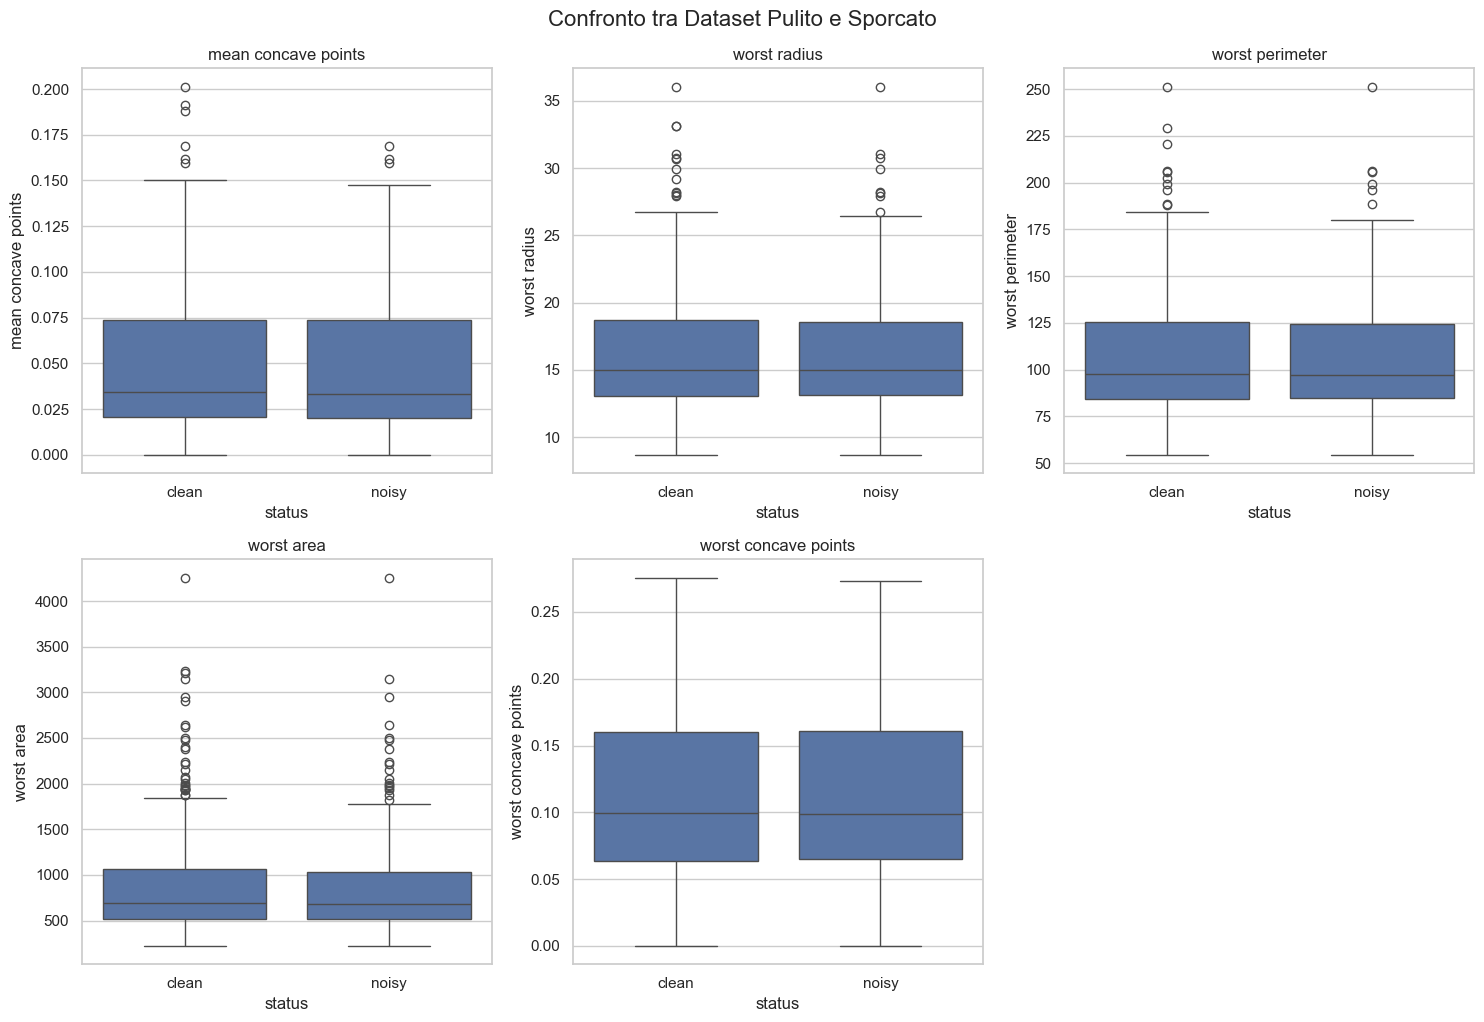

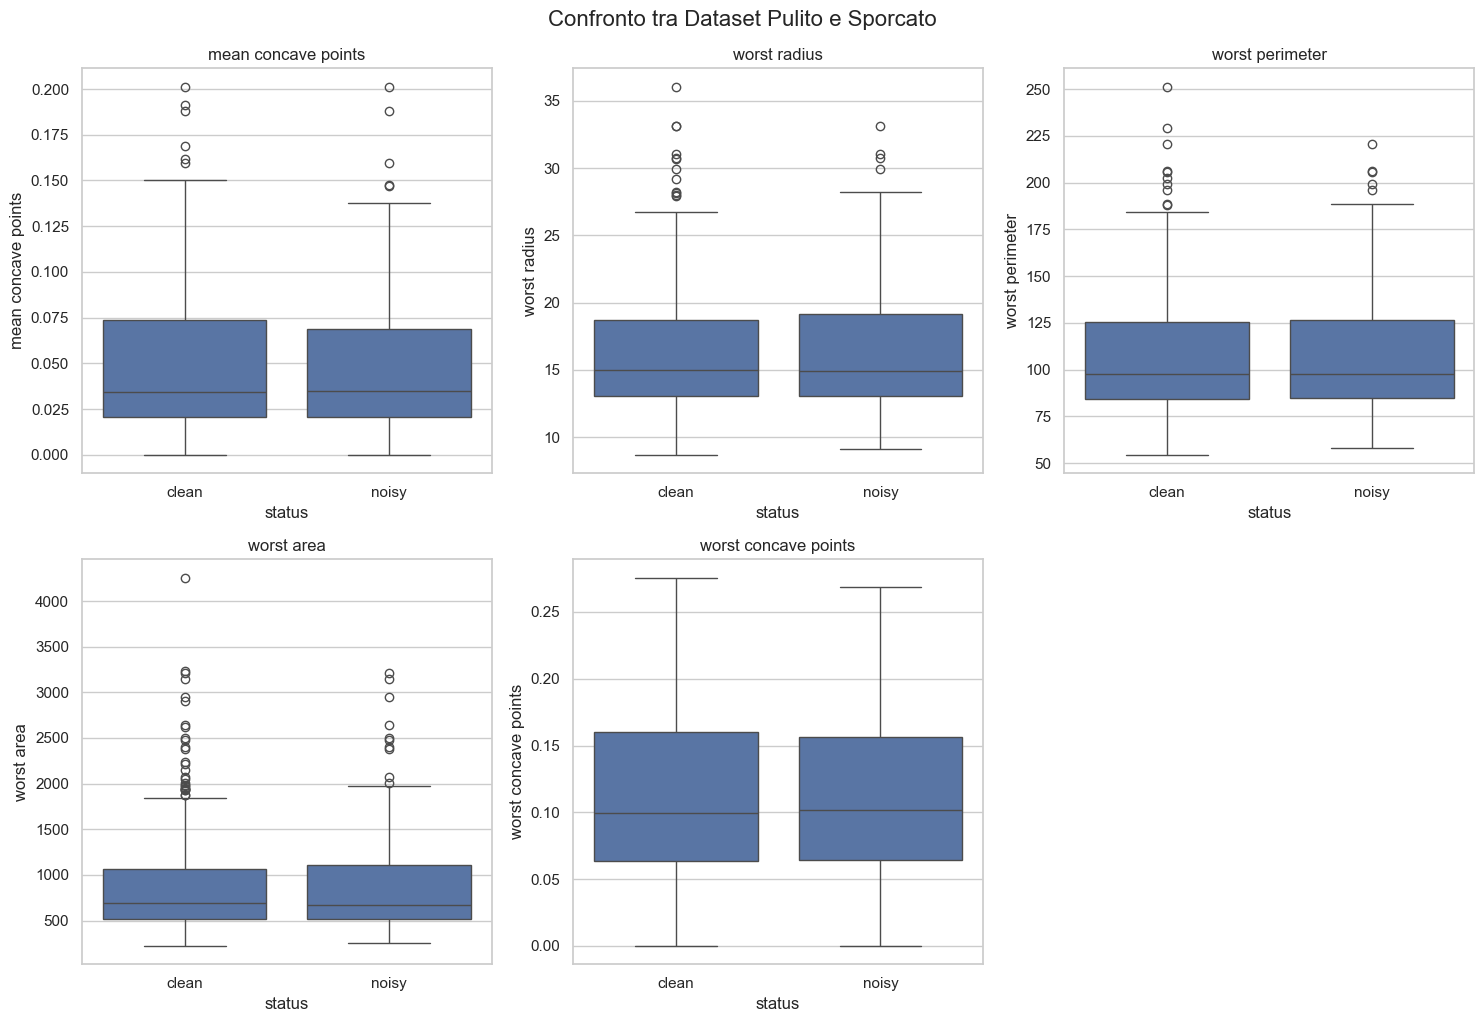

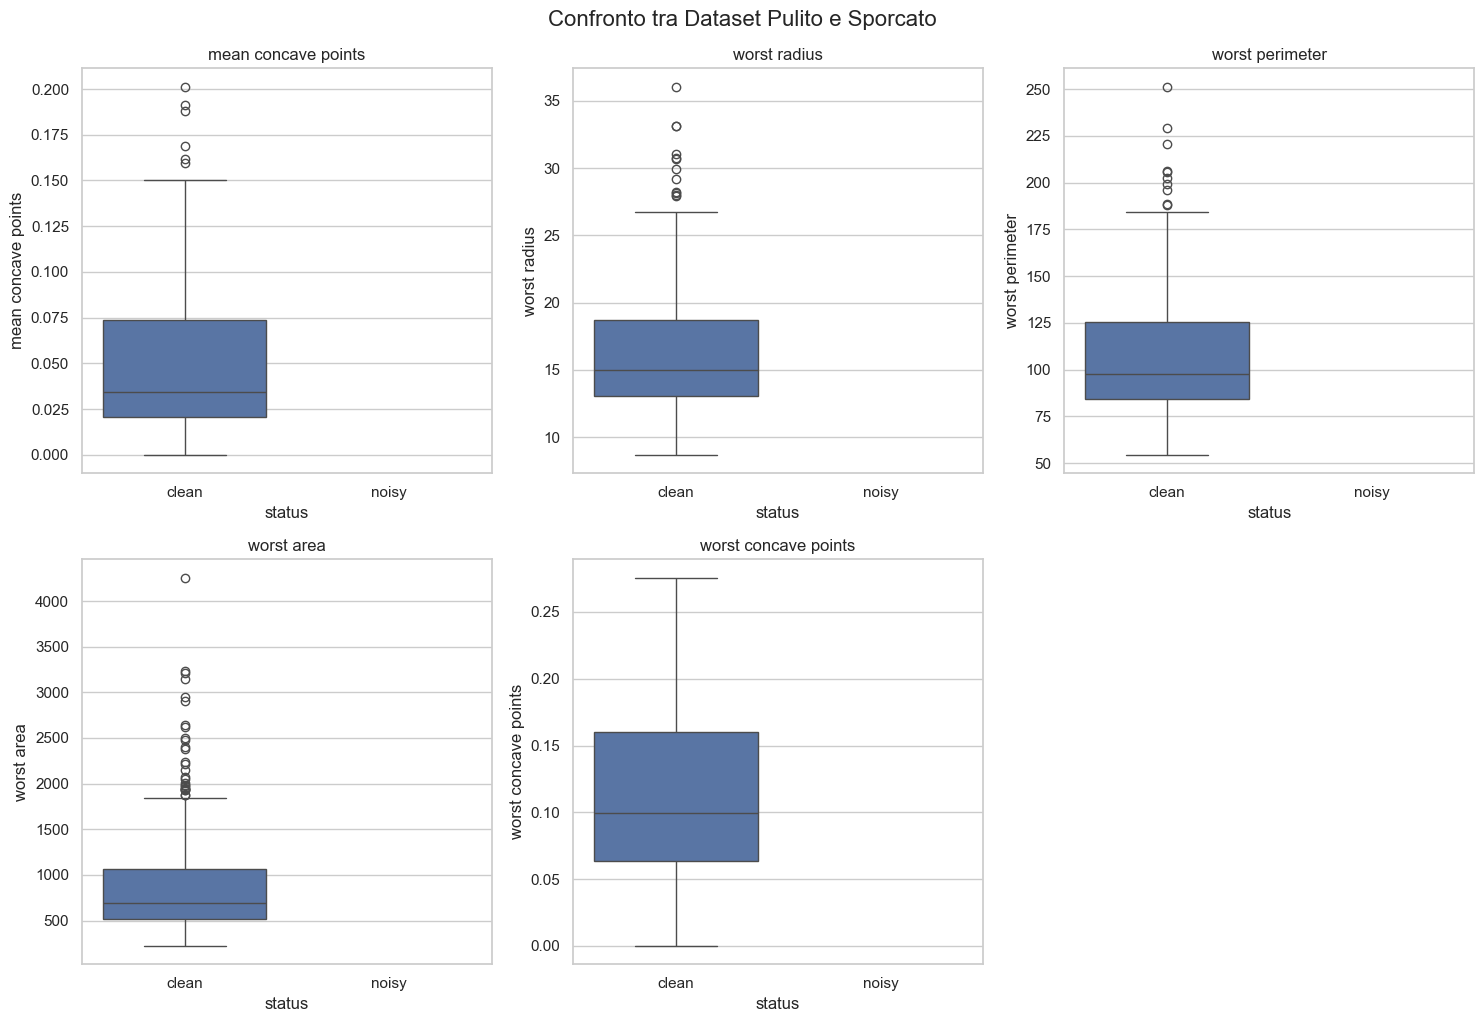

In [262]:
for item in datasetSporcatoNULL["dataset"]:
    # Chiamata alla funzione di plot per confrontare le distribuzioni delle feature
    plot_feature_distribution_comparison(X_train, item, X.columns, topFeaturesByImportance)

#### 6.6.2 Distribuzione per ogni feature con outliers

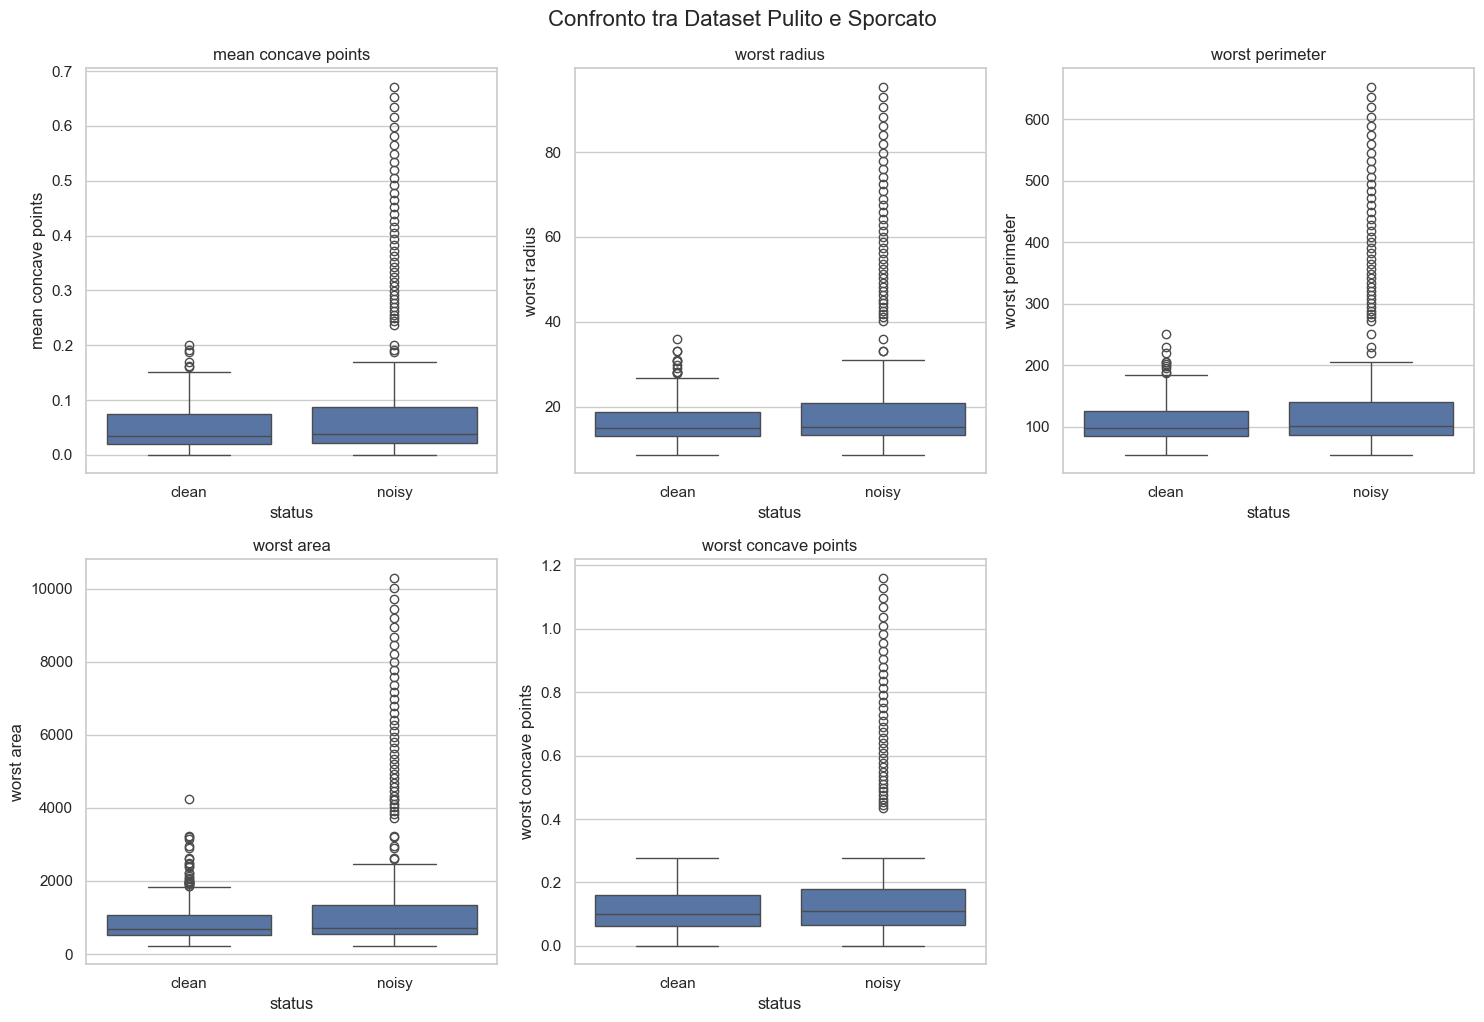

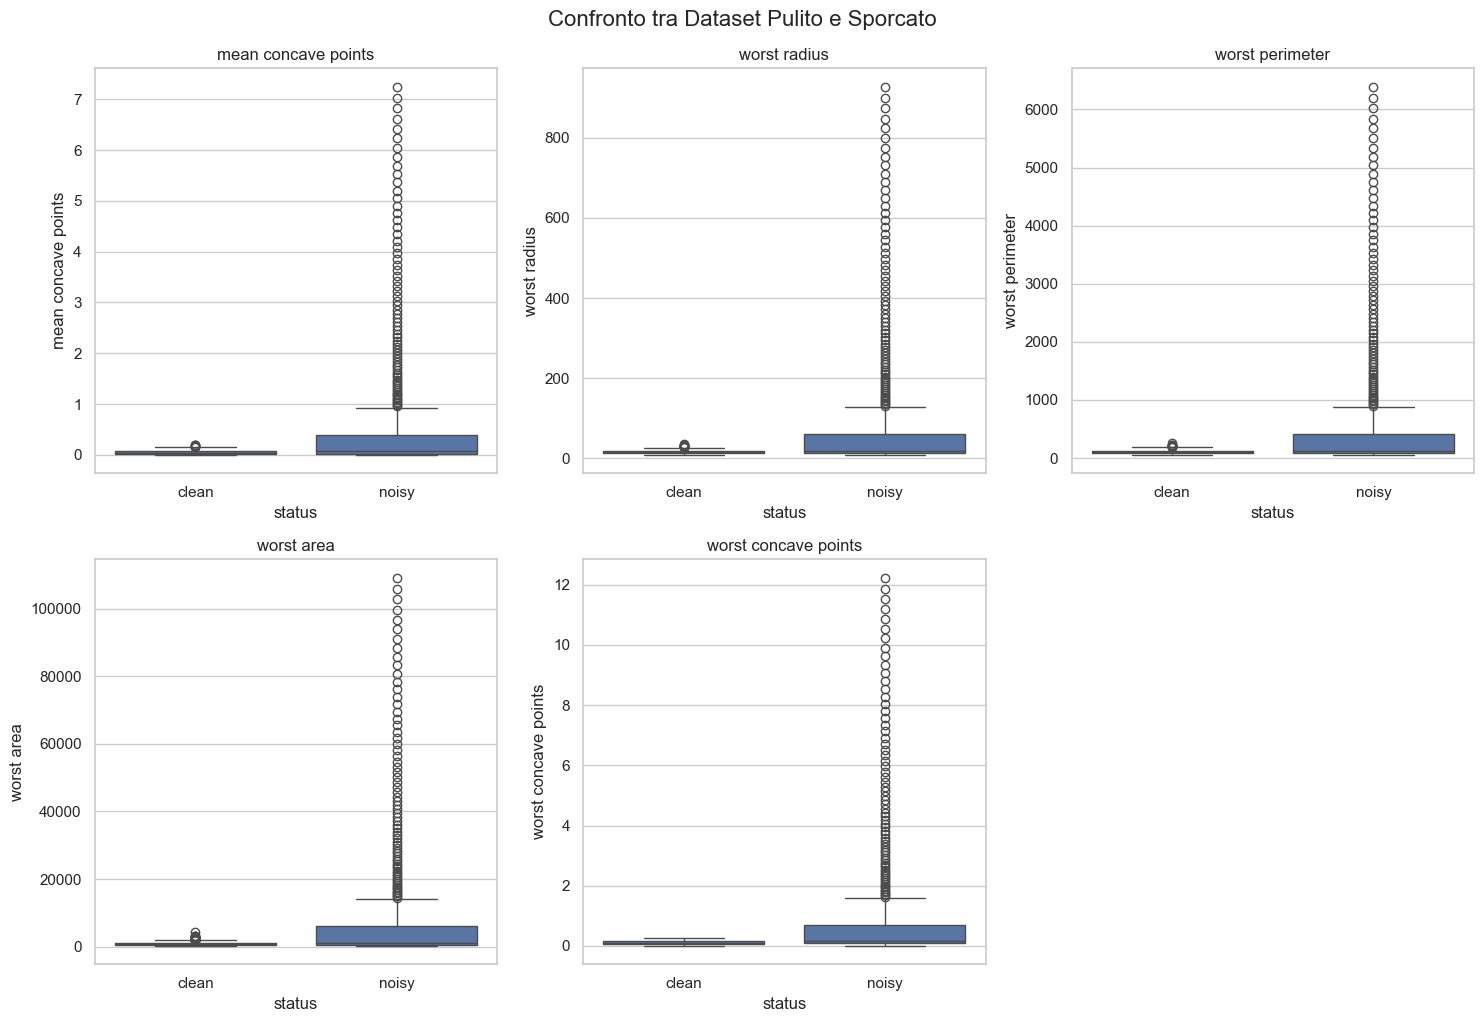

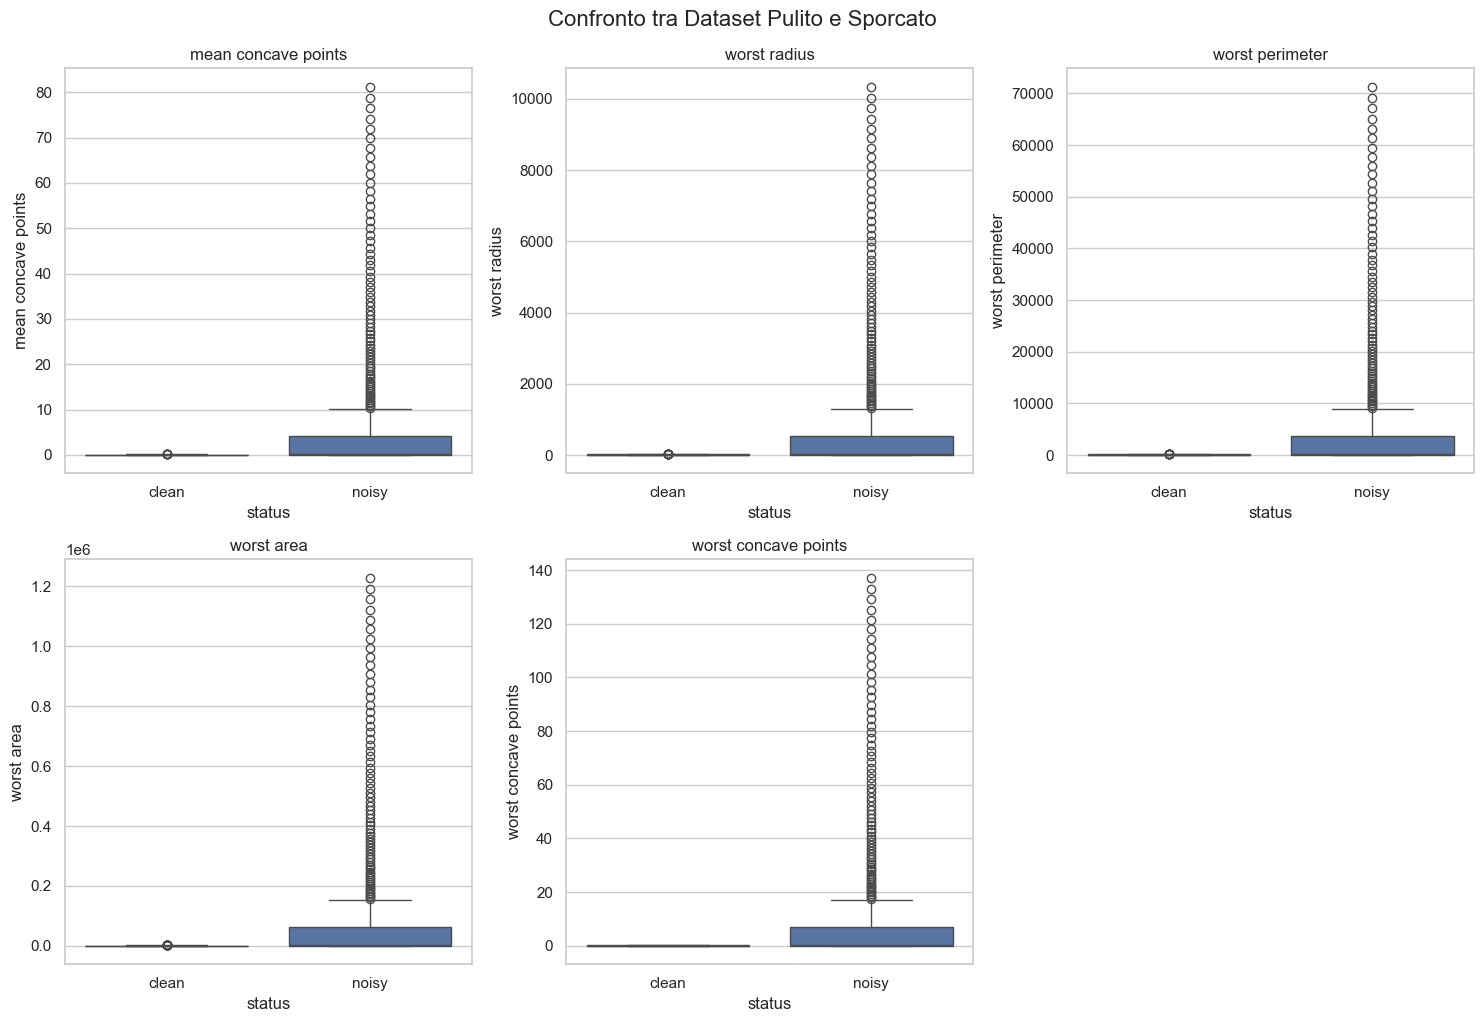

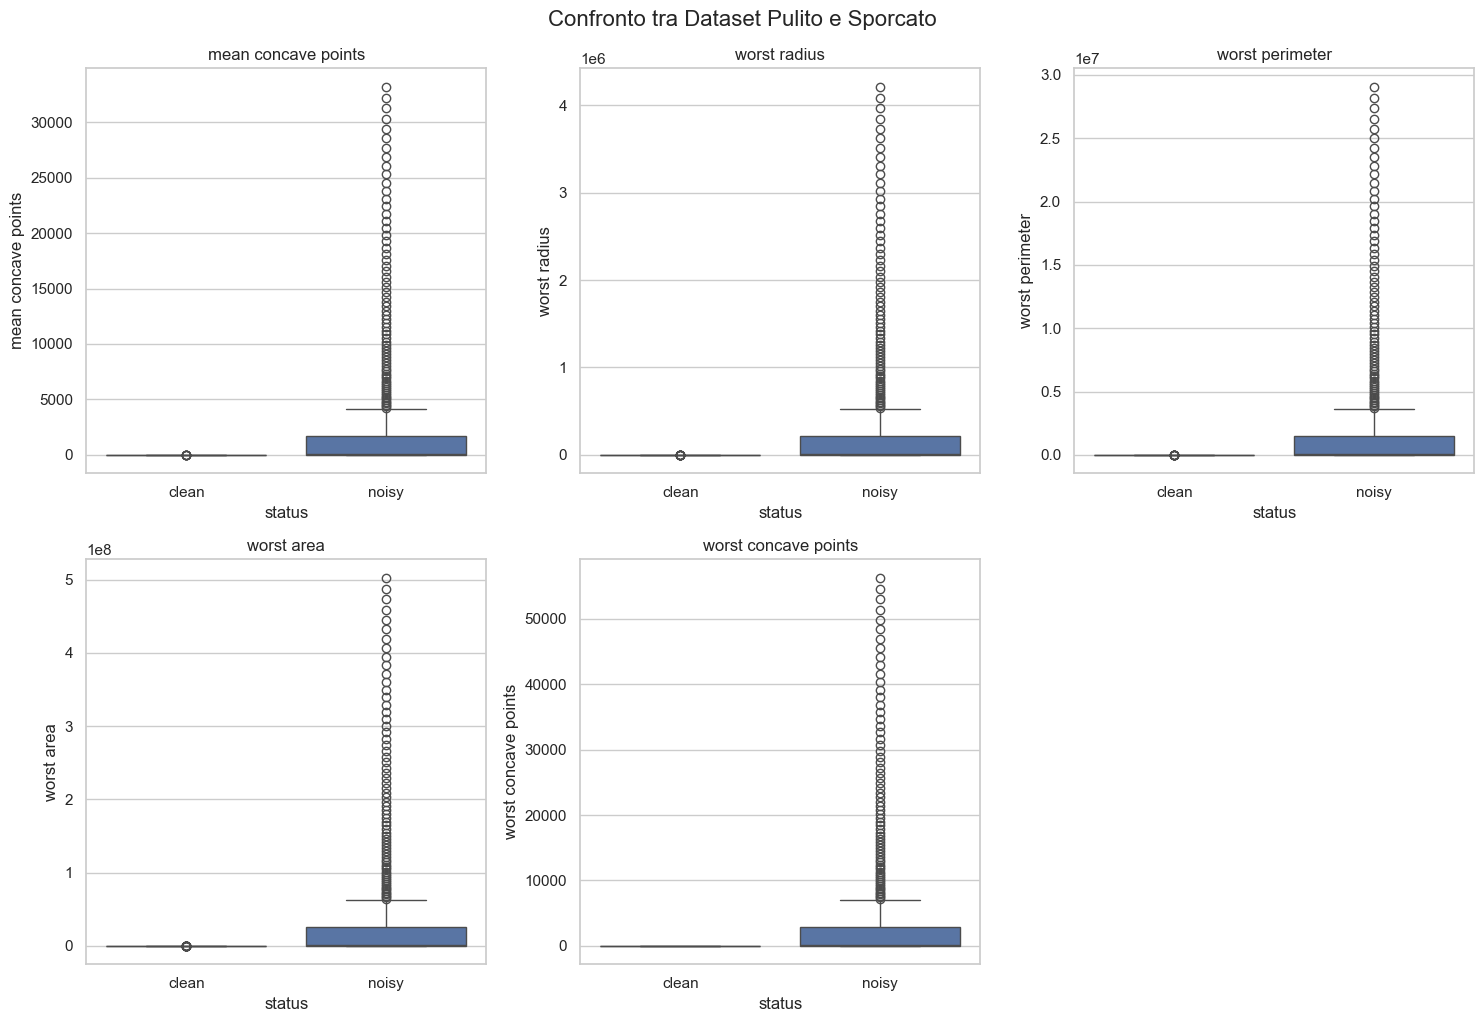

In [263]:
for item in datasetSporcatoOutliers["dataset"]:
    # Chiamata alla funzione di plot per confrontare le distribuzioni delle feature
    plot_feature_distribution_comparison(X_train, item, X.columns, topFeaturesByImportance)

#### 6.6.3 Distribuzione per ogni feature con righe duplicate

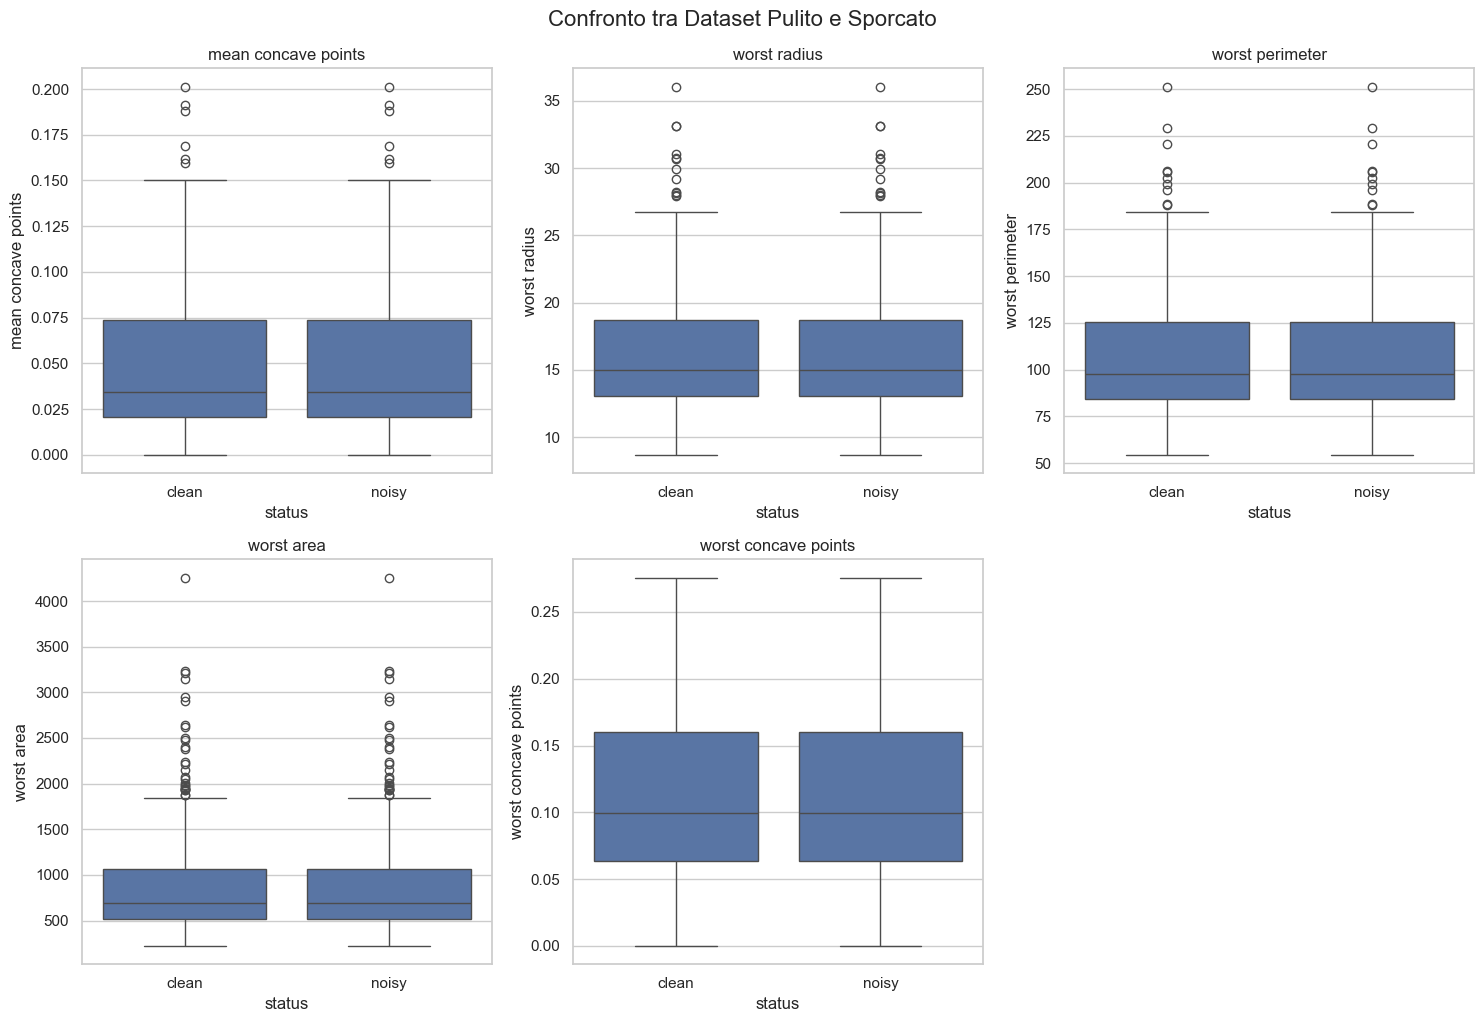

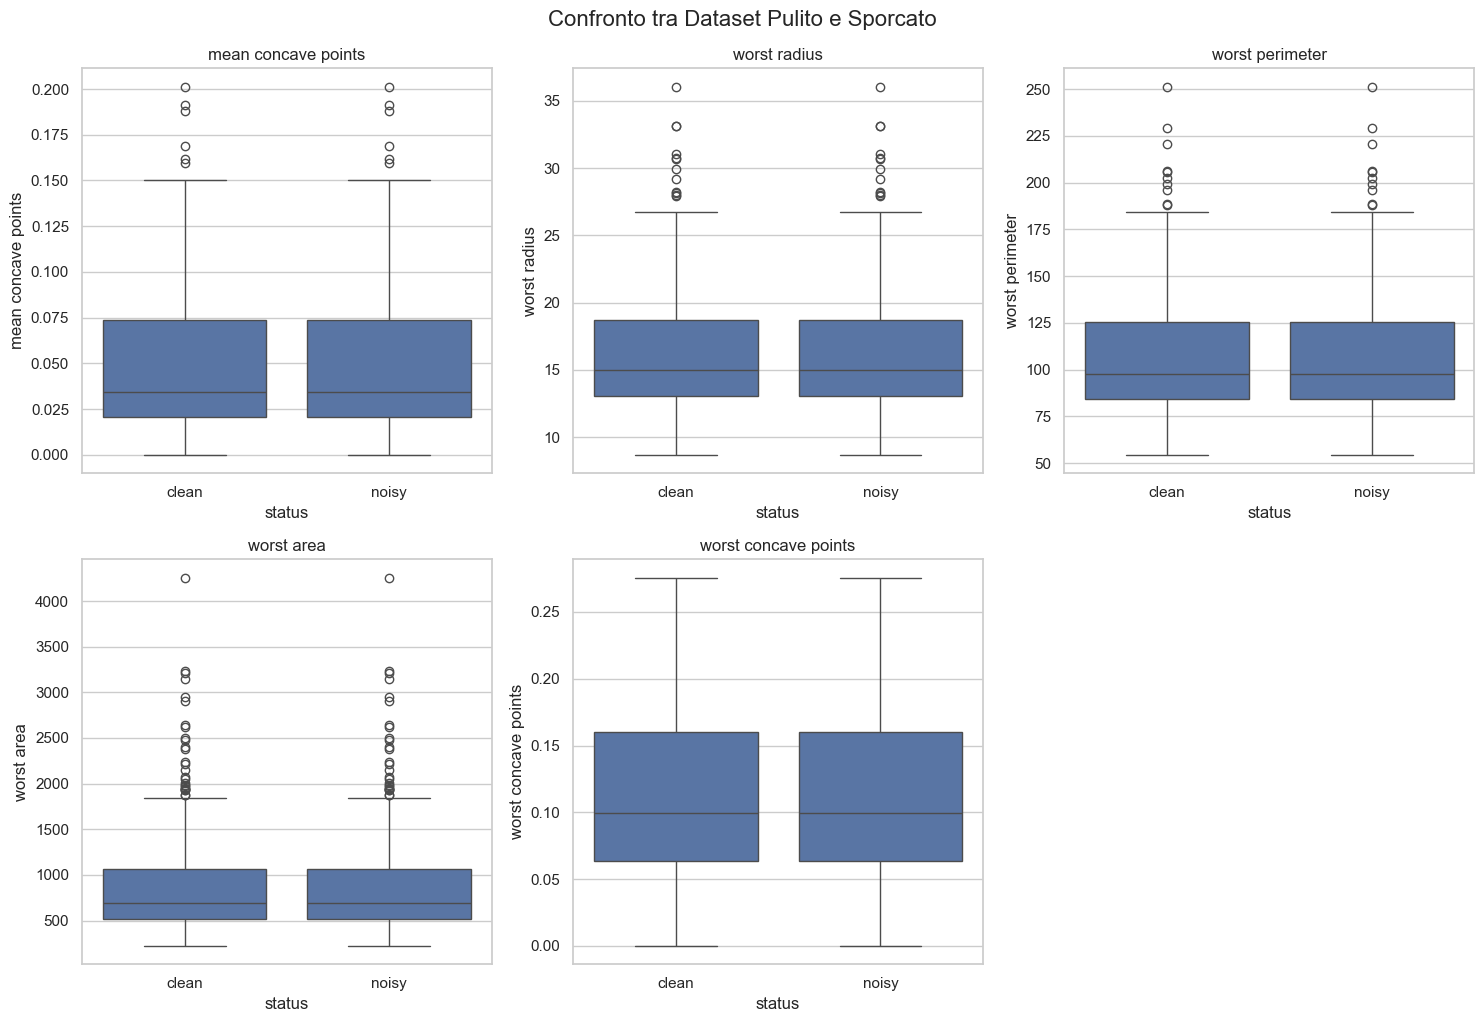

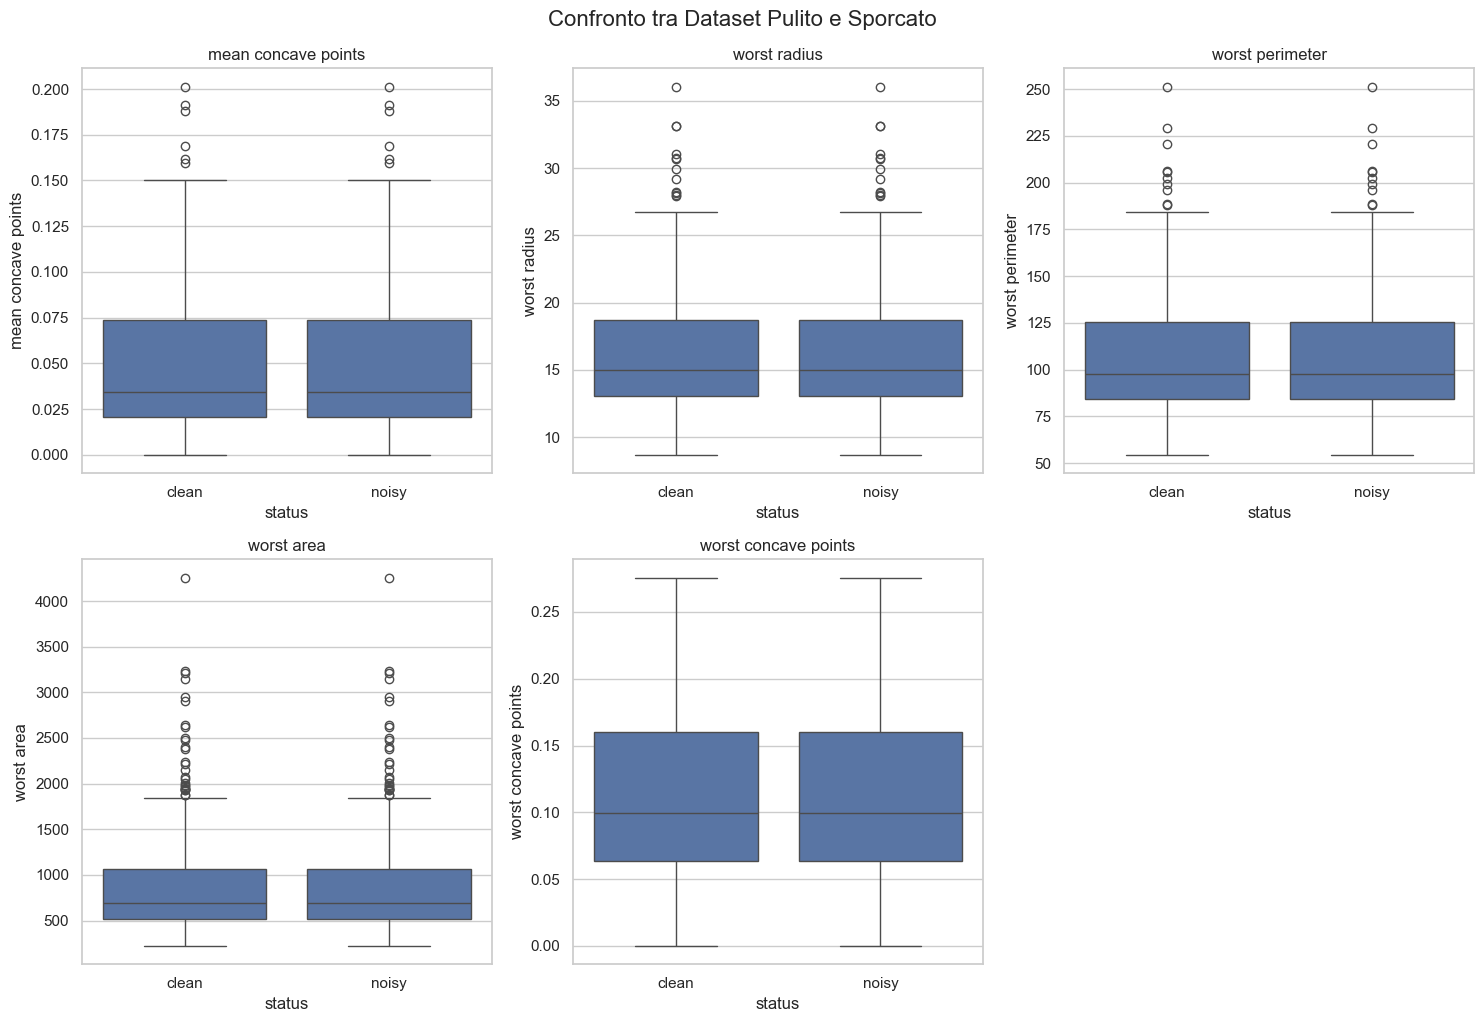

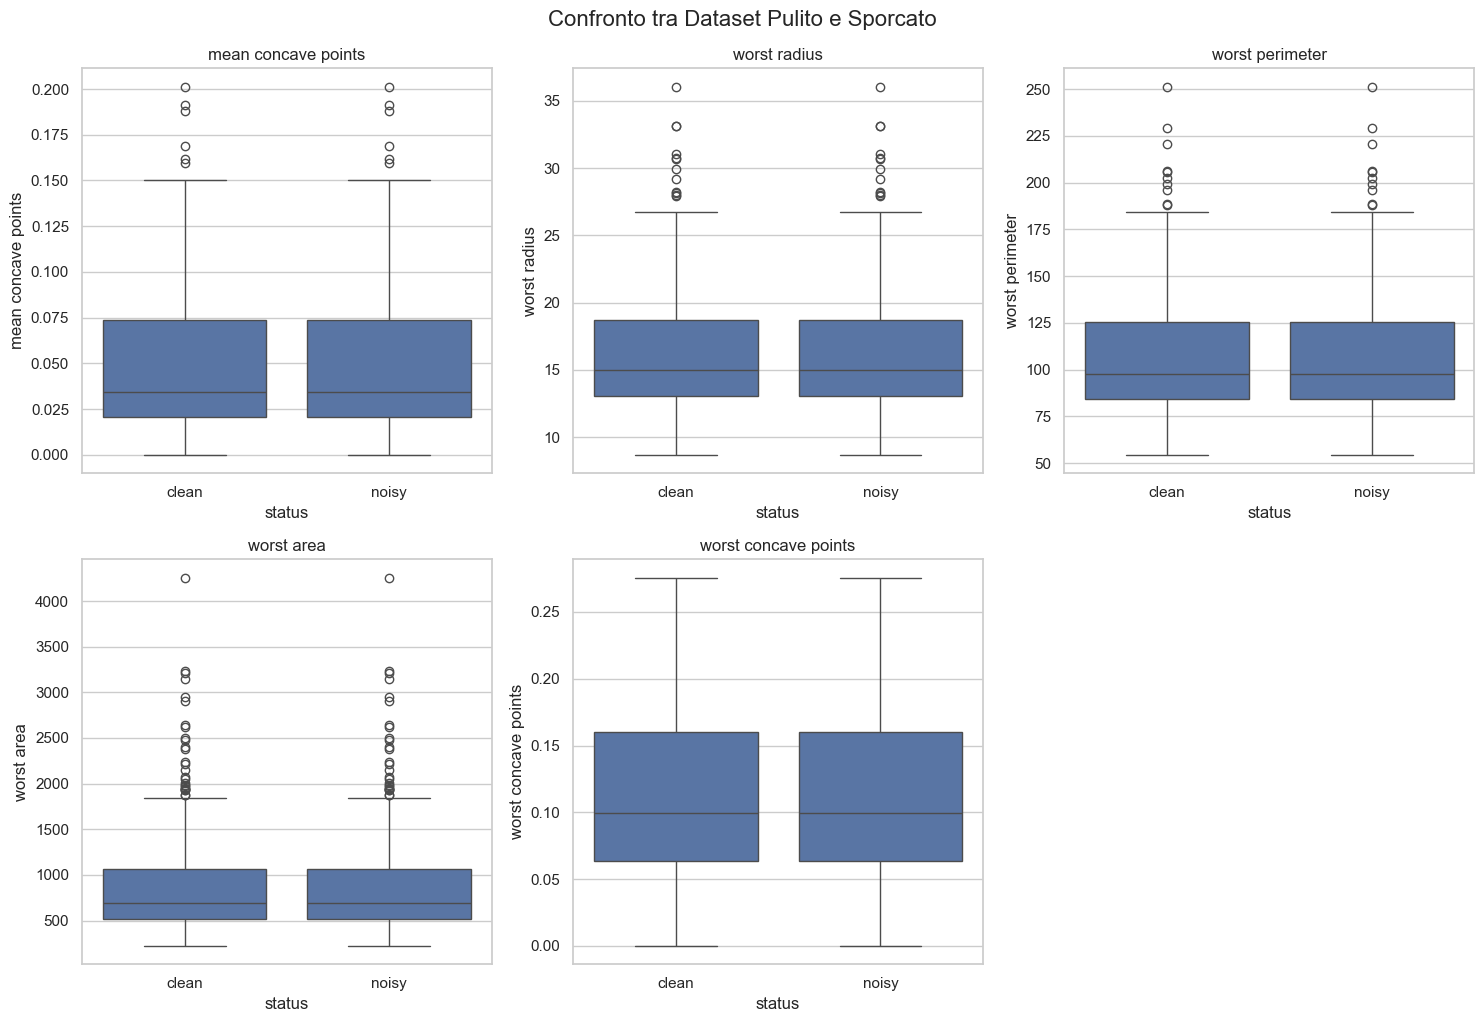

In [264]:
for item in datasetSporcatoDuplicate["dataset"]:
    # Chiamata alla funzione di plot per confrontare le distribuzioni delle feature
    plot_feature_distribution_comparison(X_train, item, X.columns, topFeaturesByImportance)